In [18]:
### Project Evaluation Phase 1
print("*************************************")
print(" \033[1m" + "Flip Robo Project Evaluation Phase 1" + "\033[0m")
print("*************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*************************************
 Flip Robo Project Evaluation Phase 1
*************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [19]:
print("---------------------------------\n")
print("\033[1m" + "Avocado Sales Analysis\n" + "\033[0m")
print("---------------------------------\n")

---------------------------------

Avocado Sales Analysis

---------------------------------



# Loading Libraries

In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, ShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, mean_squared_error, recall_score, precision_score, roc_auc_score, make_scorer, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, mean_absolute_error, r2_score, explained_variance_score, max_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_predict
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV, f_regression, RFE
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import skillsnetwork
from scipy.stats import norm
from scipy import stats
import warnings

# Loading  Dataset

In [21]:
data = pd.read_csv('avocado.csv')

In [22]:
# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

# Exploratory Data Analysis

In [23]:
# Drop the 'Unnamed: 0' column
data = data.drop('Unnamed: 0', axis=1)

In [24]:
# Display basic statistics of numerical columns
numerical_summary = data.describe()
numerical_summary

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

Let's interpret and summarize the key insights from the statistical summary of your dataset:

**1. Average Price:**
* The average price of avocados in the dataset is approximately £1.41.
* Prices vary with a standard deviation of approximately £0.40.
* Prices range from a minimum of approximately £0.44 to a maximum of approximately £3.25.
* Most prices fall within the range of £1.10 to £1.66 (25th to 75th percentiles).

**2. Total Volume:**
* The total volume of avocados in the dataset has a wide range, with a mean of approximately 850,644 units.
* Volumes vary significantly, as indicated by a high standard deviation of approximately 3,453,545 units.
* The dataset includes avocados with volumes ranging from approximately 84 units to as high as approximately 62,505,650 units.
* The majority of volumes fall within the range of approximately 10,839 units to approximately 432,962 units (25th to 75th percentiles).

**3. PLU Categories (4046, 4225, 4770):**
* These columns represent the volumes of avocados with specific PLU codes.
* Each category's mean volume varies, but further details such as quartiles, standard deviation, and min/max values are specific to each category.
* The distributions of these categories are not described in the summary.

**4. Bags Categories (Total Bags, Small Bags, Large Bags, XLarge Bags):**
* These columns represent the volumes of avocados in different types of bags.
* Each category's mean volume varies, but further details such as quartiles, standard deviation, and min/max values are specific to each category.
* The distributions of these categories are not described in the summary.

**5. Year:**
* The dataset spans the years from 2015 to 2018.
* The mean year is approximately 2016.15, indicating that the data is distributed over this time period.
* The standard deviation is approximately 0.94, suggesting that most data points fall within this timeframe.

Overall, this summary provides a snapshot of the numerical characteristics of the dataset. It's important to note that specific details about the distributions of PLU categories and bags categories are not included in the summary, so further analysis may be needed for those columns. Additionally, understanding these statistics is valuable for making informed decisions in data analysis and modelling tasks.

In [25]:
# Count unique regions
unique_regions = data['region'].nunique()

# Print the count of unique regions
print("Number of unique regions:", unique_regions)

Number of unique regions: 54


In [26]:
# Get the count of each individual region
region_counts = data['region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# Print the DataFrame showing the count of each region
region_counts

Region  Count
0                Albany    338
1            Sacramento    338
2             Northeast    338
3    NorthernNewEngland    338
4               Orlando    338
5          Philadelphia    338
6         PhoenixTucson    338
7            Pittsburgh    338
8                Plains    338
9              Portland    338
10    RaleighGreensboro    338
11      RichmondNorfolk    338
12              Roanoke    338
13             SanDiego    338
14              Atlanta    338
15         SanFrancisco    338
16              Seattle    338
17        SouthCarolina    338
18         SouthCentral    338
19            Southeast    338
20              Spokane    338
21              StLouis    338
22             Syracuse    338
23                Tampa    338
24              TotalUS    338
25                 West    338
26              NewYork    338
27     NewOrleansMobile    338
28            Nashville    338
29             Midsouth    338
30  BaltimoreWashington    338
31                Boise    338
32               Boston    338
33     BuffaloRochester    338
34           California    338
35            Charlotte    338
36              Chicago    338
37     CincinnatiDayton    338
38             Columbus    338
39        DallasFtWorth    338
40               Denver    338
41              Detroit    338
42          GrandRapids    338
43           GreatLakes    338
44   HarrisburgScranton    338
45  HartfordSpringfield    338
46              Houston    338
47         Indianapolis    338
48         Jacksonville    338
49             LasVegas    338
50           LosAngeles    338
51           Louisville    338
52    MiamiFtLauderdale    338
53     WestTexNewMexico    335

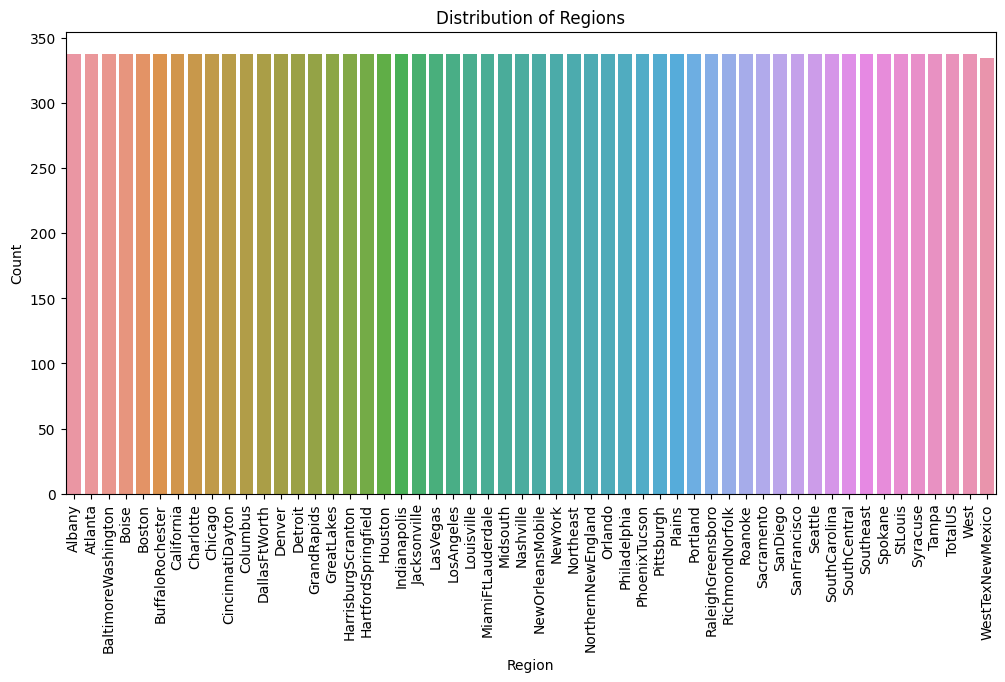

In [27]:
# Display the distribution of regions using a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=data)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

**The distribution of avocado regions in the dataset is fairly balanced**

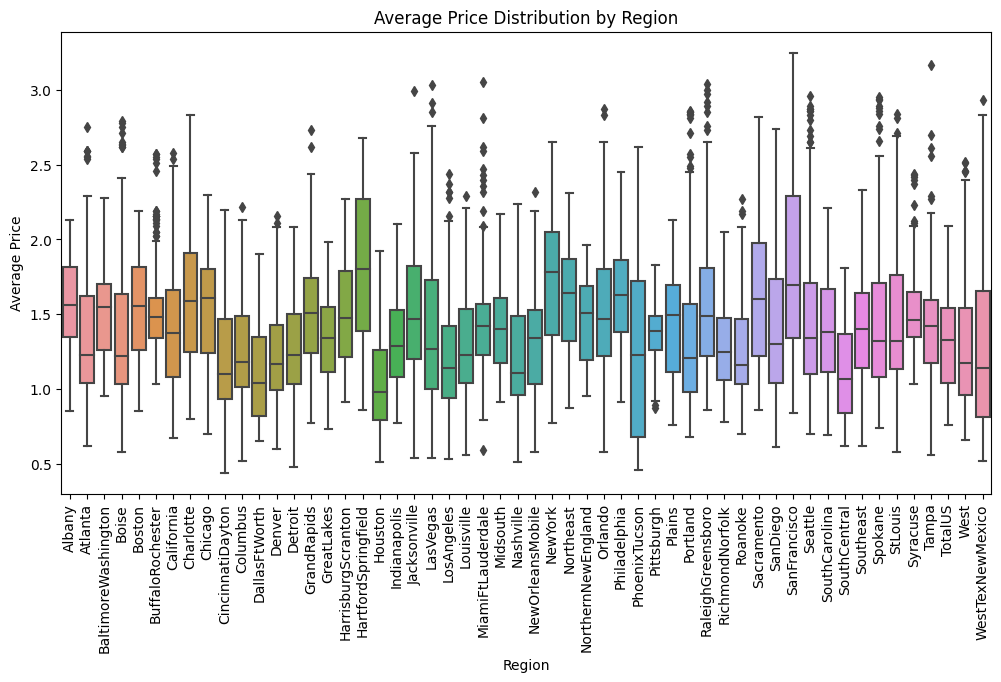

In [28]:
# Explore relationships between numerical features and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='AveragePrice', data=data)
plt.title('Average Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

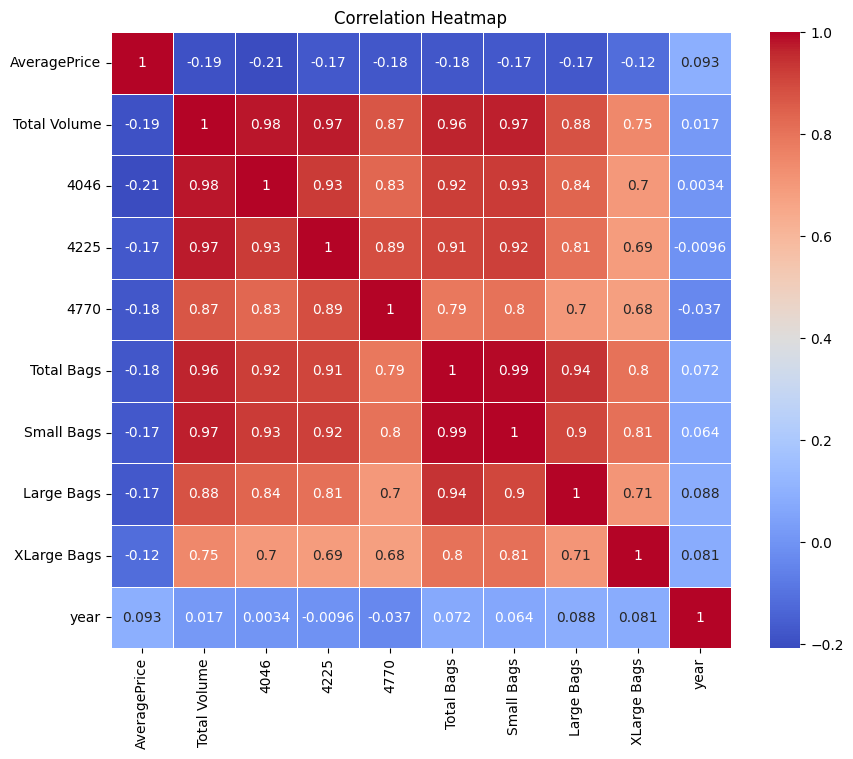

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193  
4046            0.920057    0.925280    0.838645     0.699377  0.003353  
4225            0.905787    0.916031    0.810015     0.688809 -0.009559  
4770            0.792314    0.802733    0.698471     0.679861 -0.036531  
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552  
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915  
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891  
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033  
year            0.071552    0.063915    0.087891     0.081033  1.000000

In [29]:
# Explore correlations between numerical features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

correlation_matrix

**1. AveragePrice vs. Other Features:**
* "AveragePrice" has a negative correlation with most other features, indicating that as some of these features increase, the average price tends to decrease. The strongest negative correlation is with "4046," "4225," and "4770."
* "AveragePrice" has a positive but weak correlation with "year," suggesting that average prices have slightly increased over the years.

**2. Total Volume vs. Other Features:**
* "Total Volume" has strong positive correlations with "4046," "4225," "4770," "Total Bags," and "Small Bags." This suggests that there is a significant positive relationship between the total volume of avocados and these other features.

**3. Other Features vs. Each Other:**
* "4046," "4225," and "4770" are highly correlated with each other, indicating that they are likely related in some way.
* "Total Bags" and "Small Bags" have a strong positive correlation, suggesting that they are closely related.
* "Large Bags" and "XLarge Bags" also have a positive but moderate correlation with each other.

**4. Year vs. Other Features:**
* "Year" has a very weak correlation with most other features, indicating that it is not strongly linearly related to the other numerical variables in the dataset.

Correlation does not imply causation, and these coefficients only measure linear relationships. Hence, further analysis to fully understand the relationships between these features and how they affect the target variable, "AveragePrice," will be considered dring the regression task.

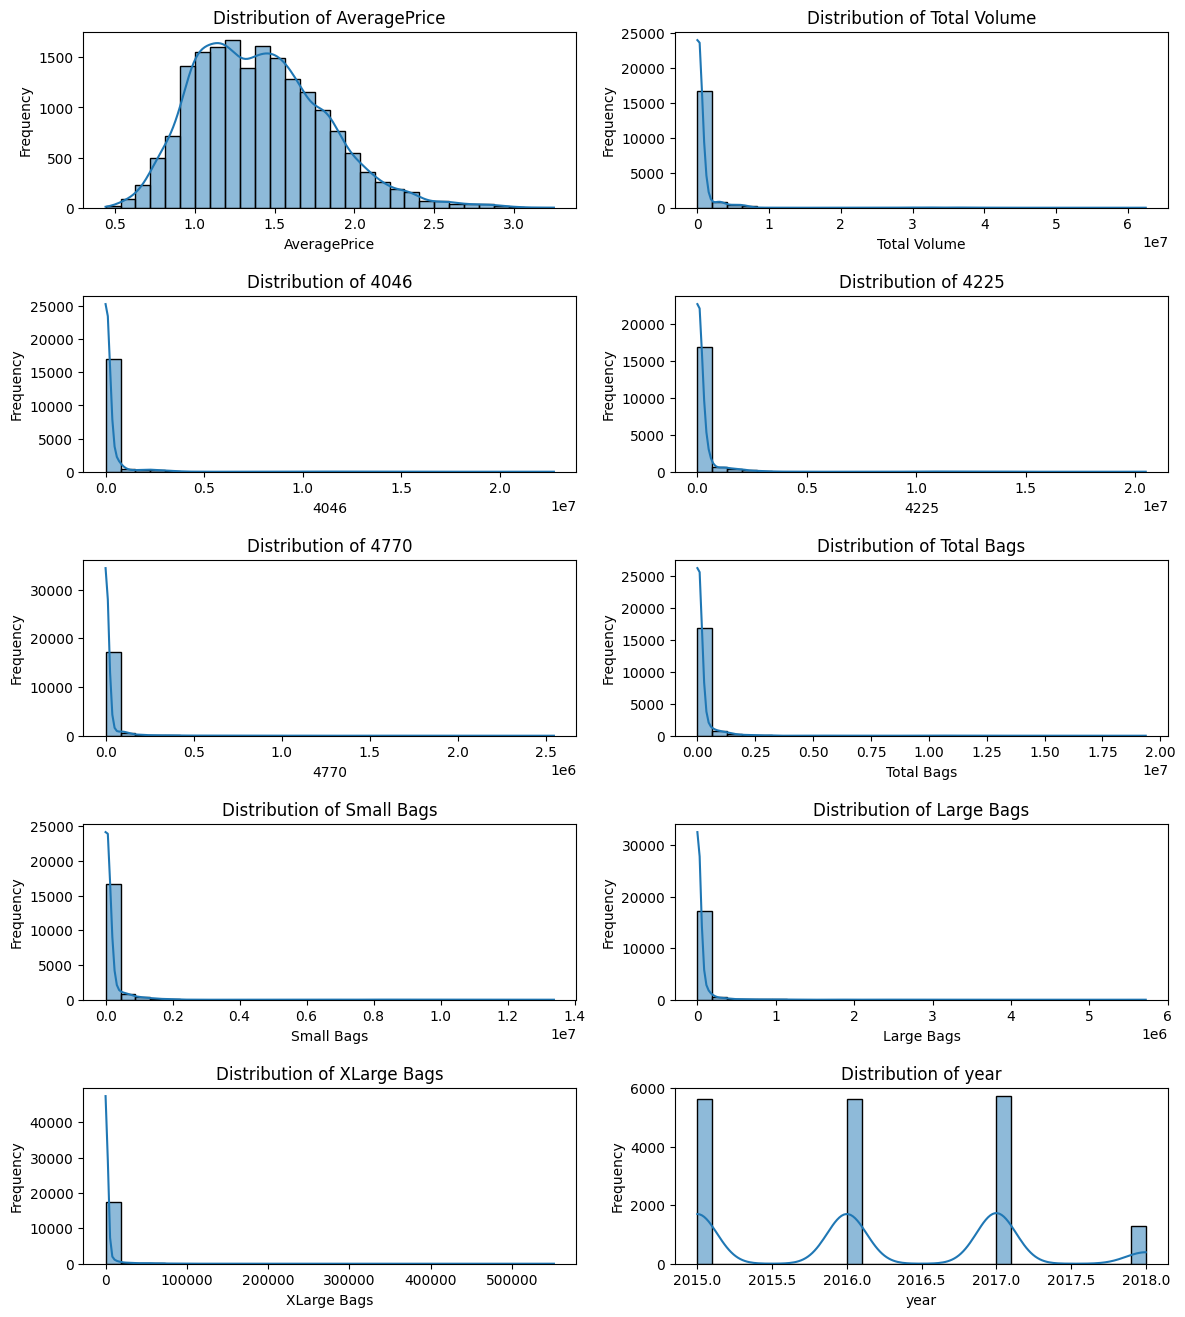

In [30]:
# Explore distributions of numerical features

# List of numerical columns to explore
numerical_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 16))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Generate a histogram for the current numerical column
    sns.histplot(data[column], bins=30, kde=True, ax=ax)
    
    # Set a title for the histogram
    ax.set_title(f'Distribution of {column}')
    
    # Label the x-axis
    ax.set_xlabel(column)
    
    # Label the y-axis as 'Frequency'
    ax.set_ylabel('Frequency')

# Show the plot
plt.show()

* The distribution of "**Average Price**" is the only one that possesses a "bell shape," it indicates a unimodal distribution with a central peak, resembling a classic bell curve or normal distribution.
* It implies that the "Average Price" data may exhibit properties such as symmetry and a defined mean and standard deviation.
* For other features in the dataset with different distribution shapes, further analysis may be required to determine how best to handle them in this specific project context of classification and regression. 
* **Total Volume, 4046, 4225, 4770 (PLU Categories), Total Bags, Small Bags, Large Bags, XLarge Bags:** These features have right-skewed distributions, indicating that there are relatively few data points with very high values (outliers) that are pulling the tail to the right. Most data points are concentrated towards lower values.


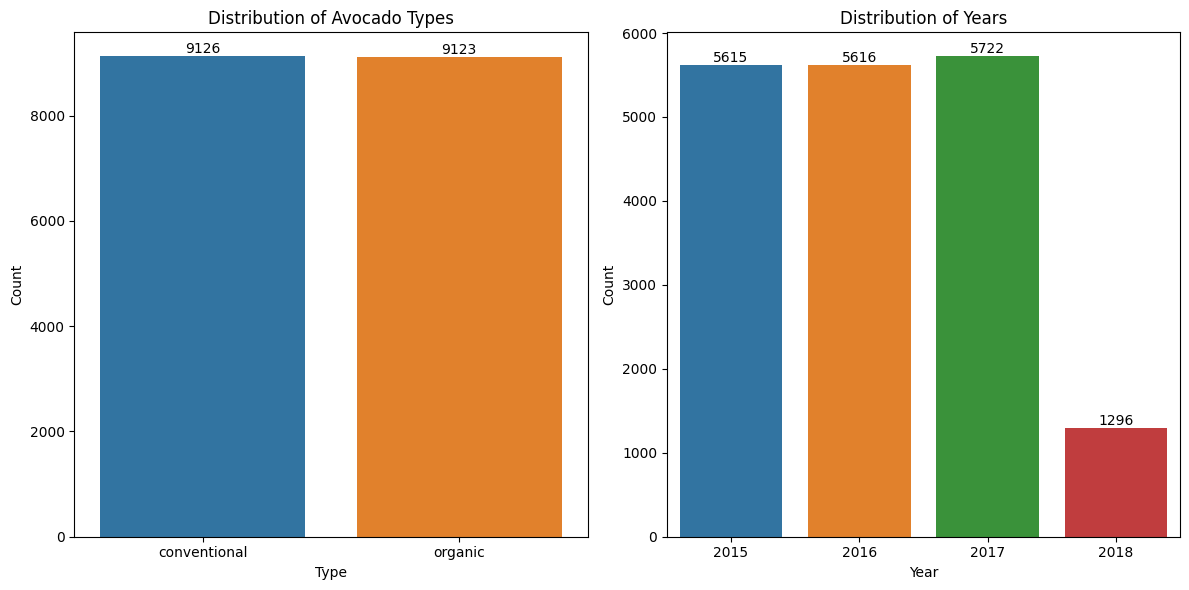

In [31]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create subplots for categorical features
plt.subplot(1, 2, 1)
sns.countplot(x='type', data=data)
plt.title('Distribution of Avocado Types')
plt.xlabel('Type')
plt.ylabel('Count')

# Add count on top of each bar for 'type'
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.subplot(1, 2, 2)
sns.countplot(x='year', data=data)
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')

# Add count on top of each bar for 'year'
ax2 = plt.gca()
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

* There are two types of avocados: "conventional" and "organic."
* The distribution of avocado types in the dataset is fairly balanced, with a similar number of entries for both "conventional" and "organic" avocados.
* The dataset covers multiple years: 2015, 2016, 2017, and 2018.
* The year feature plot suggests that the dataset is weighted more towards the years 2015, 2016, and 2017, with relatively fewer entries for 2018.

<Figure size 1200x600 with 0 Axes>

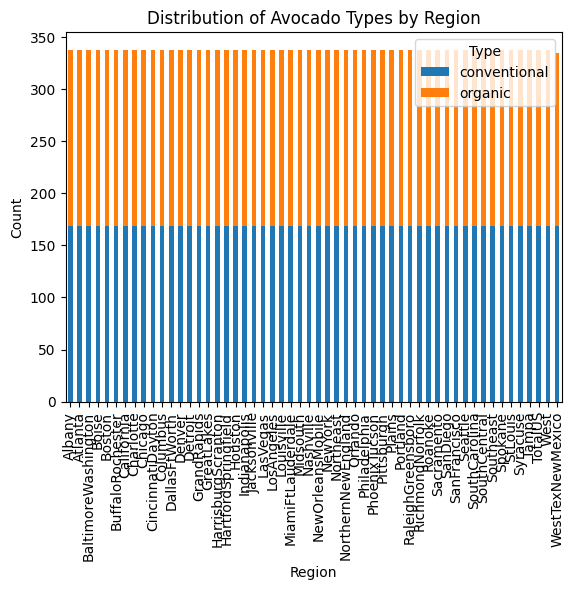

In [32]:
# Create a pivot table to count occurrences of avocado types by region
pivot_table = data.pivot_table(index='region', columns='type', values='AveragePrice', aggfunc='count', fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Distribution of Avocado Types by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()


<Figure size 1200x600 with 0 Axes>

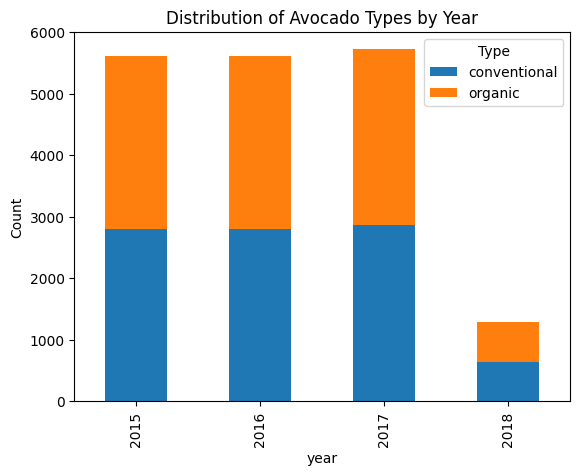

In [33]:
# Create a pivot table to count occurrences of avocado types by Year
pivot_table = data.pivot_table(index='year', columns='type', values='AveragePrice', aggfunc='count', fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Distribution of Avocado Types by Year')
plt.xlabel('year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()


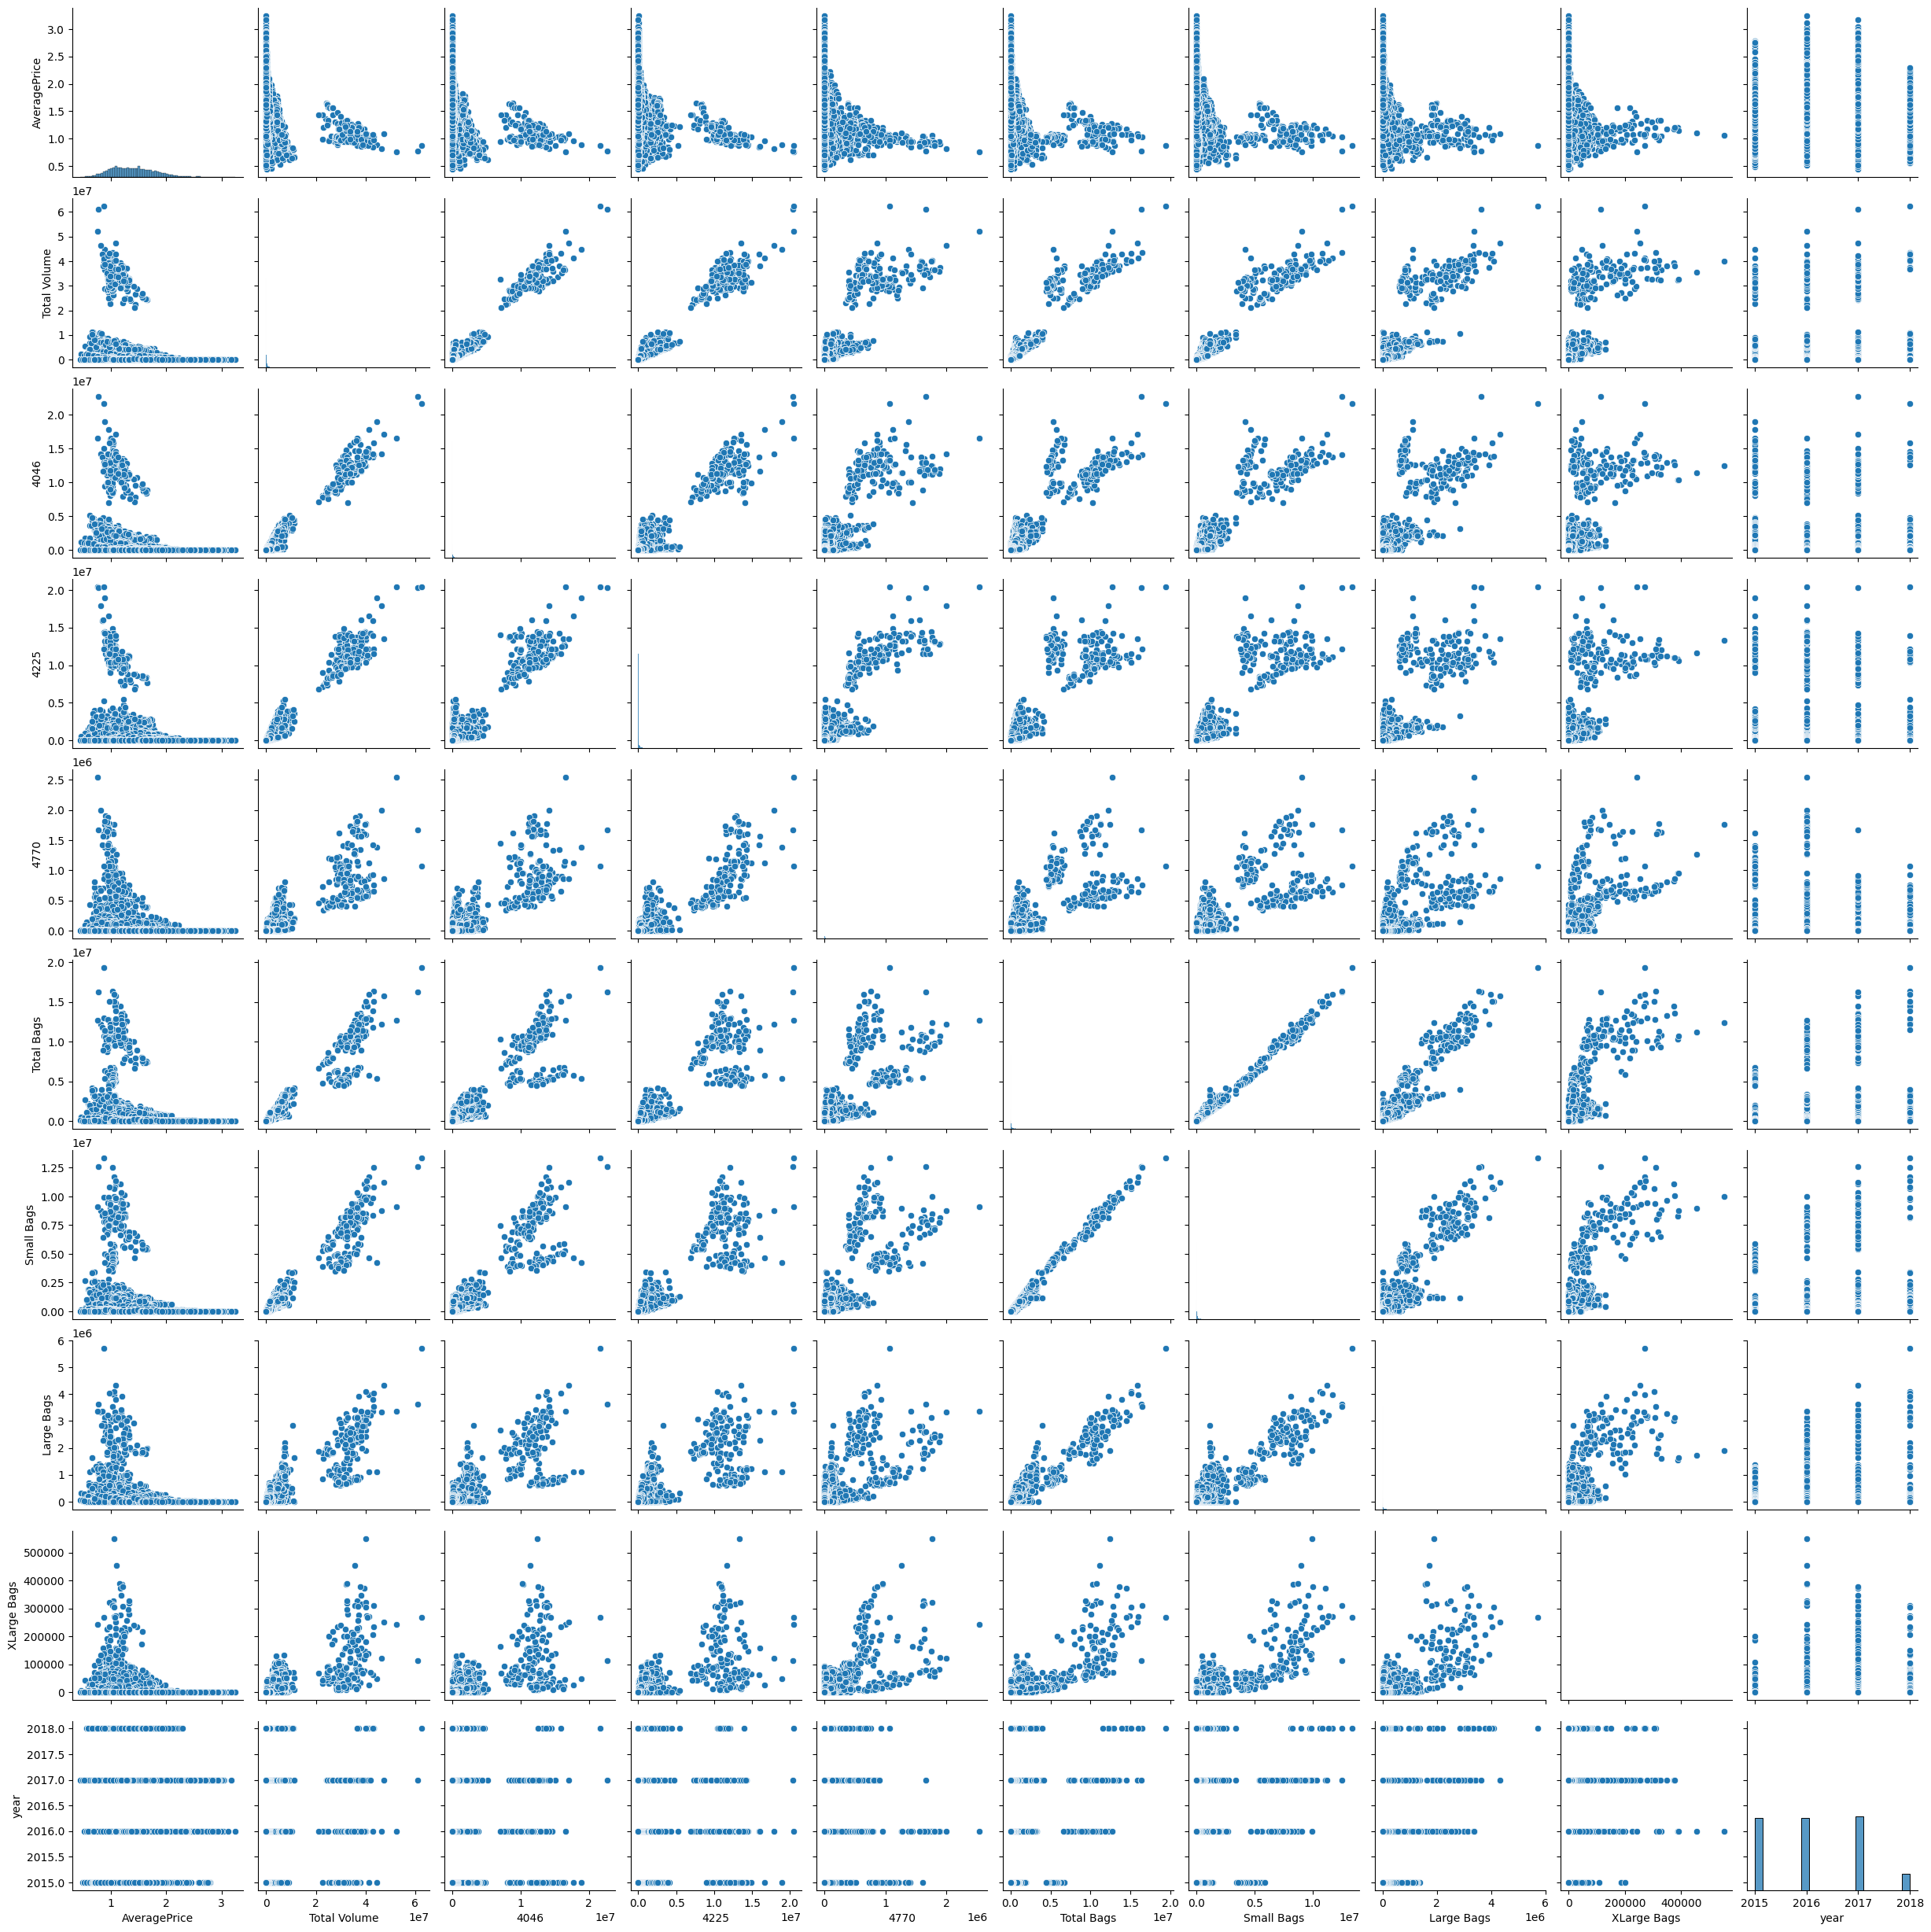

In [34]:
# Create a pair plot
sns.pairplot(data[numerical_columns])
plt.show()


# Data Preprocessing

### Classification Task: Predicting Avocado Region

In this classification task, the goal is to predict the region or city where a given avocado sale observation took place. The "Region" column in the dataset provides information about the city or region. This task involves training a machine learning model to classify avocados into their respective regions based on various features such as date, type (conventional or organic), total volume sold, and more.

# Data Pre-Processing

**Objective:**

Build a classification model that accurately predicts the region of avocado sales based on available dataset features.


### Dropping Unnecessary Columns  

In [35]:
# Create a copy of the original data for preprocessing
data_class = data.copy()

# Drop unnecessary columns
columns_to_drop = ['Date']
data_class = data_class.drop(columns=columns_to_drop)

In [36]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [37]:
# List of categorical columns to encode
categorical_columns = ['type']

# Perform one-hot encoding
data_class_encoded = pd.get_dummies(data_class, columns=categorical_columns, drop_first=True)

# 'drop_first=True' drops one of the encoded columns to avoid multicollinearity

# Now, 'data_class_encoded' contains the one-hot encoded data with categorical variables converted to numerical format

In [38]:
data_class_encoded.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  year  region  type_organic  
0     8603.62       93.25          0.0  2015  Albany             0  
1     9408.07       97.49          0.0  2015  Albany             0  
2     8042.21      103.14          0.0  2015  Albany             0  
3     5677.40      133.76          0.0  2015  Albany             0  
4     5986.26      197.69          0.0  2015  Albany             0

In [39]:
data_class_encoded.tail()

AveragePrice  Total Volume     4046     4225    4770  Total Bags  \
18244          1.63      17074.83  2046.96  1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70  3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92  2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63  2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77  2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  year            region  \
18244    13066.82      431.85          0.0  2018  WestTexNewMexico   
18245     8940.04      324.80          0.0  2018  WestTexNewMexico   
18246     9351.80       42.31          0.0  2018  WestTexNewMexico   
18247    10919.54       50.00          0.0  2018  WestTexNewMexico   
18248    11988.14       26.01          0.0  2018  WestTexNewMexico   

       type_organic  
18244             1  
18245             1  
18246             1  
18247             1  
18248             1

In [40]:
data_class_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   year          18249 non-null  int64  
 10  region        18249 non-null  object 
 11  type_organic  18249 non-null  uint8  
dtypes: float64(9), int64(1), object(1), uint8(1)
memory usage: 1.5+ MB


In [41]:
data_class_encoded.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

       type_organic  
count  18249.000000  
mean       0.499918  
std        0.500014  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

**1. Average Price (AveragePrice):**
* Central Tendency: The mean (average) price of avocados is approximately £1.41.
* Spread: Prices vary from a minimum of £0.44 to a maximum of £3.25.
* Distribution: The distribution of average prices appears to be somewhat right-skewed, as the mean is slightly greater than the median (50th percentile).

**2. Total Volume (Total Volume):**
* Central Tendency: The mean total volume of avocados sold is approximately 850,644 units.
* Spread: Total volumes vary widely, with a minimum of 84.56 units and a maximum of 62,505,650 units.
* Distribution: The distribution of total volumes is highly right-skewed, with a long tail towards higher volumes.

**3. PLU 4046 (4046):**
* Central Tendency: The mean PLU 4046 volume is approximately 293,008 units.
* Spread: Volumes of PLU 4046 range from 0 units to a maximum of 22,743,620 units.
* Distribution: The distribution of PLU 4046 volumes is also right-skewed, with a long tail to the right.

**4. PLU 4225 (4225):**
* Central Tendency: The mean PLU 4225 volume is approximately 295,155 units.
* Spread: Volumes of PLU 4225 vary from 0 units to a maximum of 20,470,570 units.
* Distribution: Similar to PLU 4046, PLU 4225 volumes exhibit a right-skewed distribution.

**5. PLU 4770 (4770):**
* Central Tendency: The mean PLU 4770 volume is approximately 22,840 units.
* Spread: Volumes of PLU 4770 range from 0 units to a maximum of 2,546,439 units.
* Distribution: The distribution of PLU 4770 volumes is also right-skewed.

**6. Total Bags (Total Bags):**
* Central Tendency: The mean total bags is approximately 239,639 units.
* Spread: Total bags vary from 0 units to a maximum of 19,373,130 units.
* Distribution: Total bags display a right-skewed distribution.

**7. Small Bags (Small Bags):**
* Central Tendency: The mean small bags is approximately 182,194 units.
* Spread: Small bags range from 0 units to a maximum of 13,384,590 units.
* Distribution: Small bags exhibit a right-skewed distribution.

**8. Large Bags (Large Bags):**
* Central Tendency: The mean large bags is approximately 54,338 units.
* Spread: Large bags vary from 0 units to a maximum of 5,719,097 units.
* Distribution: Large bags also have a right-skewed distribution.

**9. XLarge Bags (XLarge Bags):**
* Central Tendency: The mean XLarge bags is approximately 3,106 units.
* Spread: XLarge bags range from 0 units to a maximum of 551,693.65 units.
* Distribution: XLarge bags display a right-skewed distribution.

**10. Year (year):**
* Central Tendency: The dataset spans multiple years, with a range from 2015 to 2018.
* Distribution: The distribution of years seems to be relatively equally distributed, with the exception of 2018, which has fewer data points compared to other years.

**11. Type Organic (type_organic):**
* Central Tendency: This is a binary variable indicating whether the avocado type is organic or not. The mean is approximately 0.5, indicating a roughly equal distribution of organic and non-organic avocados.

In summary, the numerical features in the dataset exhibit various levels of right-skewness, indicating that they have long tails on the right side of their distributions. This means that there are relatively fewer data points with very high values for these features. Additionally, the spread of values for these features is quite extensive, with a substantial range between the minimum and maximum values. The central tendency measures (mean and median) provide insight into the typical values for each feature.

# Data Split

In [42]:
# Define your feature columns (X) and target column (y)
X = data_class_encoded.drop(columns=['region'])
y = data_class_encoded['region']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling 

In [43]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Feature Selection

In [44]:
# Create a Random Forest Classifier (you can replace this with other classifiers)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your training data
clf.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort features by importance in descending order
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Print feature importance scores and corresponding feature names
for idx in sorted_feature_indices:
    print(f"Feature: {X.columns[idx]}, Importance: {feature_importances[idx]}")



Feature: 4046, Importance: 0.18195165631775806
Feature: 4225, Importance: 0.16176817443358096
Feature: Total Volume, Importance: 0.11426072651291073
Feature: 4770, Importance: 0.11405046810541541
Feature: Large Bags, Importance: 0.09937067857946491
Feature: Small Bags, Importance: 0.09667885984567368
Feature: AveragePrice, Importance: 0.07779726818899094
Feature: Total Bags, Importance: 0.07678486004348647
Feature: year, Importance: 0.03409067892435225
Feature: XLarge Bags, Importance: 0.024250319009654745
Feature: type_organic, Importance: 0.01899631003871182


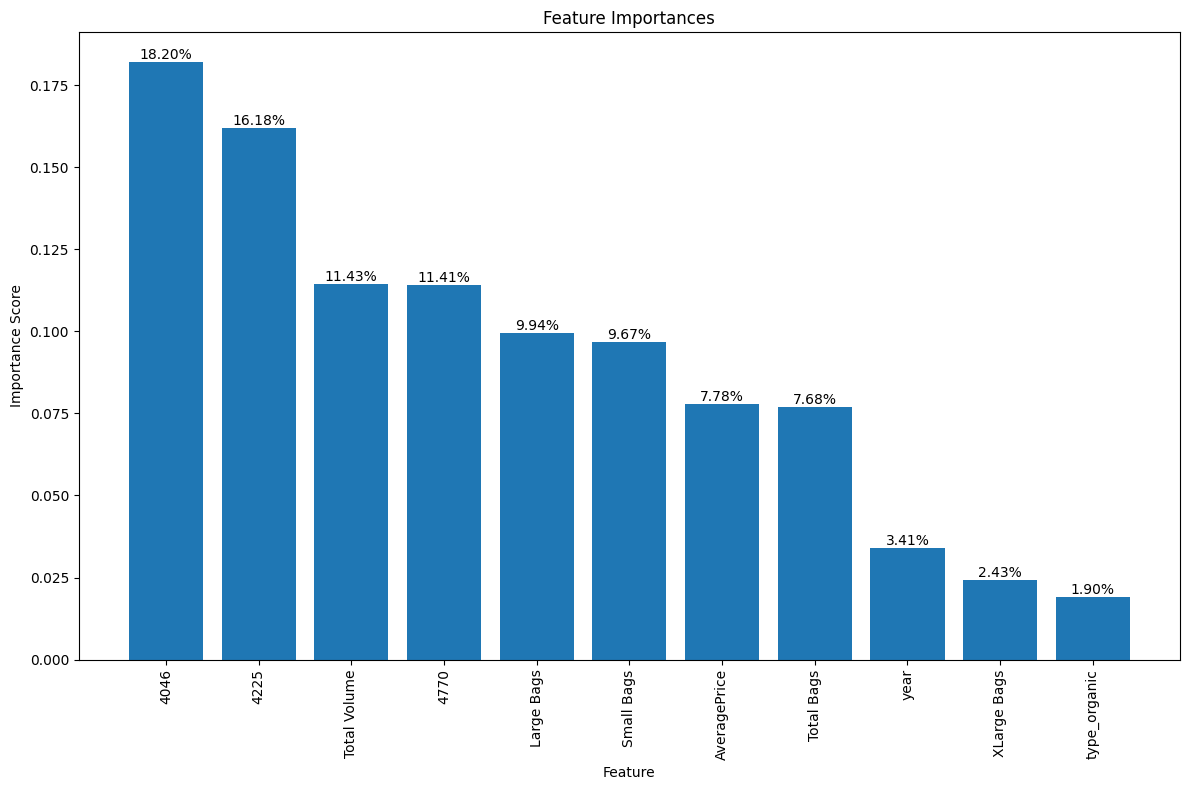

In [45]:
# Calculate total feature importance sum for percentage calculation
total_importance = feature_importances.sum()

# Visualize feature importances with data labels in percentage format
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(sorted_feature_indices)), feature_importances[sorted_feature_indices])
plt.xticks(range(len(sorted_feature_indices)), X.columns[sorted_feature_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances')

# Add data labels in percentage format to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height/total_importance*100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [47]:
# Select the top k most important features (you can change the value of k)
k = 11  # Adjust this value as needed
selected_feature_indices = sorted_feature_indices[:k]

# Create a new DataFrame with selected features
selected_features = X.columns[selected_feature_indices]
X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

selected_features

Index(['4046', '4225', 'Total Volume', '4770', 'Large Bags', 'Small Bags',
       'AveragePrice', 'Total Bags', 'year', 'XLarge Bags', 'type_organic'],
      dtype='object')

# Classification Models

C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: Random Forest
Accuracy: 0.9093
Classification Report:
{'Albany': {'precision': 0.8656716417910447, 'recall': 0.9206349206349206, 'f1-score': 0.8923076923076922, 'support': 63}, 'Atlanta': {'precision': 0.8493150684931506, 'recall': 0.8493150684931506, 'f1-score': 0.8493150684931505, 'support': 73}, 'BaltimoreWashington': {'precision': 0.9836065573770492, 'recall': 0.9836065573770492, 'f1-score': 0.9836065573770492, 'support': 61}, 'Boise': {'precision': 0.927536231884058, 'recall': 0.8888888888888888, 'f1-score': 0.9078014184397163, 'support': 72}, 'Boston': {'precision': 0.9014084507042254, 'recall': 0.9552238805970149, 'f1-score': 0.927536231884058, 'support': 67}, 'BuffaloRochester': {'precision': 0.8333333333333334, 'recall': 0.821917808219178, 'f1-score': 0.8275862068965517, 'support': 73}, 'California': {'precision': 1.0, 'recall': 0.9838709677419355, 'f1-score': 0.991869918699187, 'support': 62}, 'Charlotte': {'precision': 0.9714285714285714, 'recall': 0.8947368421052632,

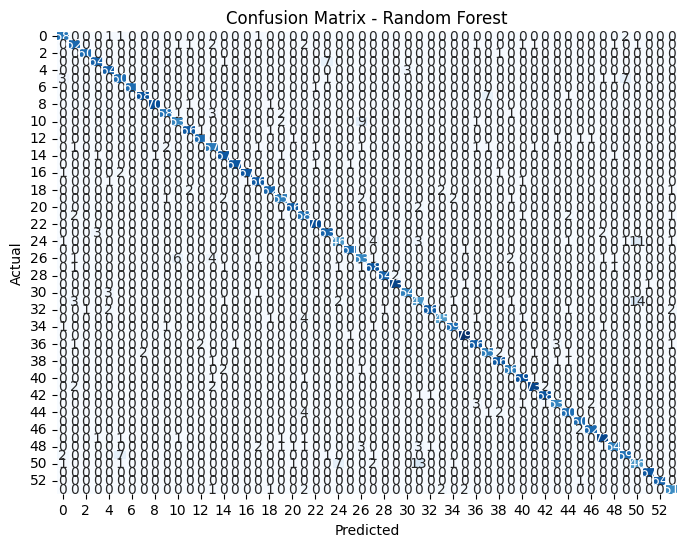

Model: Logistic Regression
Accuracy: 0.3384
Classification Report:
{'Albany': {'precision': 0.17801047120418848, 'recall': 0.5396825396825397, 'f1-score': 0.2677165354330709, 'support': 63}, 'Atlanta': {'precision': 0.32558139534883723, 'recall': 0.1917808219178082, 'f1-score': 0.24137931034482757, 'support': 73}, 'BaltimoreWashington': {'precision': 0.532258064516129, 'recall': 0.5409836065573771, 'f1-score': 0.5365853658536586, 'support': 61}, 'Boise': {'precision': 0.11949685534591195, 'recall': 0.2638888888888889, 'f1-score': 0.16450216450216448, 'support': 72}, 'Boston': {'precision': 0.4857142857142857, 'recall': 0.2537313432835821, 'f1-score': 0.33333333333333337, 'support': 67}, 'BuffaloRochester': {'precision': 0.6666666666666666, 'recall': 0.136986301369863, 'f1-score': 0.22727272727272727, 'support': 73}, 'California': {'precision': 0.6206896551724138, 'recall': 0.5806451612903226, 'f1-score': 0.6000000000000001, 'support': 62}, 'Charlotte': {'precision': 0.4864864864864865,

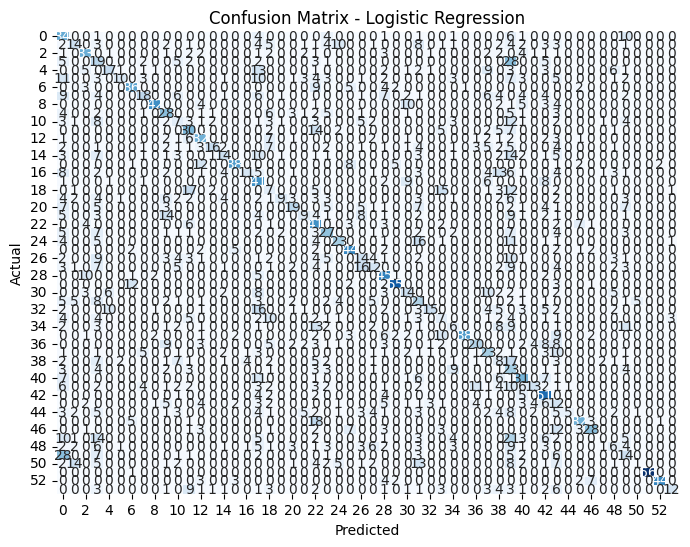

Model: K-Nearest Neighbors
Accuracy: 0.4907
Classification Report:
{'Albany': {'precision': 0.19594594594594594, 'recall': 0.4603174603174603, 'f1-score': 0.2748815165876777, 'support': 63}, 'Atlanta': {'precision': 0.2892561983471074, 'recall': 0.4794520547945205, 'f1-score': 0.3608247422680412, 'support': 73}, 'BaltimoreWashington': {'precision': 0.43956043956043955, 'recall': 0.6557377049180327, 'f1-score': 0.5263157894736842, 'support': 61}, 'Boise': {'precision': 0.3220338983050847, 'recall': 0.5277777777777778, 'f1-score': 0.4, 'support': 72}, 'Boston': {'precision': 0.3627450980392157, 'recall': 0.5522388059701493, 'f1-score': 0.43786982248520706, 'support': 67}, 'BuffaloRochester': {'precision': 0.2982456140350877, 'recall': 0.4657534246575342, 'f1-score': 0.36363636363636365, 'support': 73}, 'California': {'precision': 0.8125, 'recall': 0.8387096774193549, 'f1-score': 0.8253968253968254, 'support': 62}, 'Charlotte': {'precision': 0.43037974683544306, 'recall': 0.44736842105263

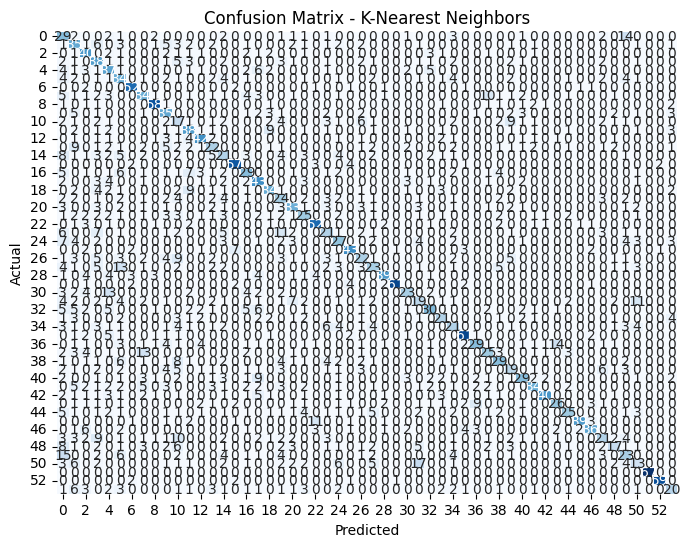

Model: Support Vector Machine
Accuracy: 0.3526
Classification Report:
{'Albany': {'precision': 0.08494208494208494, 'recall': 0.3492063492063492, 'f1-score': 0.13664596273291926, 'support': 63}, 'Atlanta': {'precision': 0.40384615384615385, 'recall': 0.2876712328767123, 'f1-score': 0.336, 'support': 73}, 'BaltimoreWashington': {'precision': 0.3173076923076923, 'recall': 0.5409836065573771, 'f1-score': 0.4, 'support': 61}, 'Boise': {'precision': 0.36363636363636365, 'recall': 0.2222222222222222, 'f1-score': 0.27586206896551724, 'support': 72}, 'Boston': {'precision': 0.6666666666666666, 'recall': 0.29850746268656714, 'f1-score': 0.41237113402061853, 'support': 67}, 'BuffaloRochester': {'precision': 0.375, 'recall': 0.0410958904109589, 'f1-score': 0.07407407407407407, 'support': 73}, 'California': {'precision': 0.8571428571428571, 'recall': 0.4838709677419355, 'f1-score': 0.6185567010309277, 'support': 62}, 'Charlotte': {'precision': 0.3235294117647059, 'recall': 0.14473684210526316, 'f1

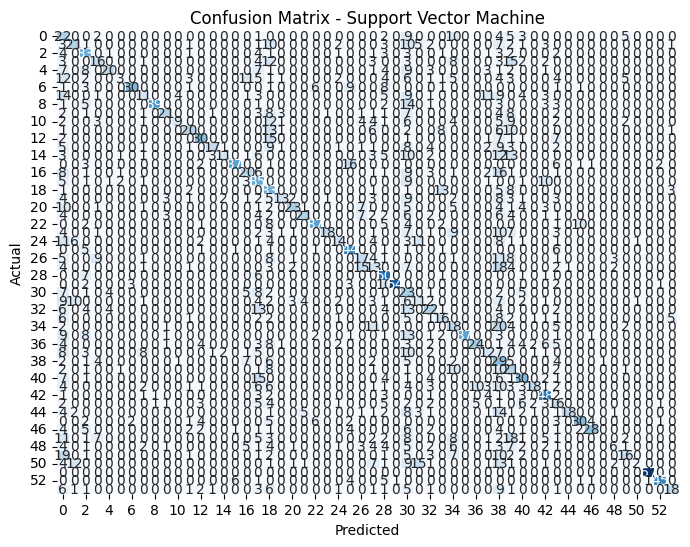

In [48]:
# Define and train the classification models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Use scaled features for training
    y_pred = model.predict(X_test_scaled)  # Use scaled features for prediction
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    }

# Print the results for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("\n")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [82]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Define and train the classification models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    
    # Get the class labels from the classification report
    labels = list(report_dict.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
    
    # Calculate the weighted average of precision, recall, and f1-score
    weighted_precision = sum(report_dict[label]['precision'] * report_dict[label]['support'] for label in labels) / len(y_test)
    weighted_recall = sum(report_dict[label]['recall'] * report_dict[label]['support'] for label in labels) / len(y_test)
    weighted_f1_score = sum(report_dict[label]['f1-score'] * report_dict[label]['support'] for label in labels) / len(y_test)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Weighted Precision': weighted_precision,
        'Weighted Recall': weighted_recall,
        'Weighted F1 Score': weighted_f1_score
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


Model  Accuracy  Weighted Precision  Weighted Recall  \
0           Random Forest  0.909315            0.909739         0.909315   
1     Logistic Regression  0.338356            0.431218         0.338356   
2     K-Nearest Neighbors  0.490685            0.520453         0.490685   
3  Support Vector Machine  0.352603            0.511162         0.352603   

   Weighted F1 Score  
0           0.909001  
1           0.340414  
2           0.496283  
3           0.374552

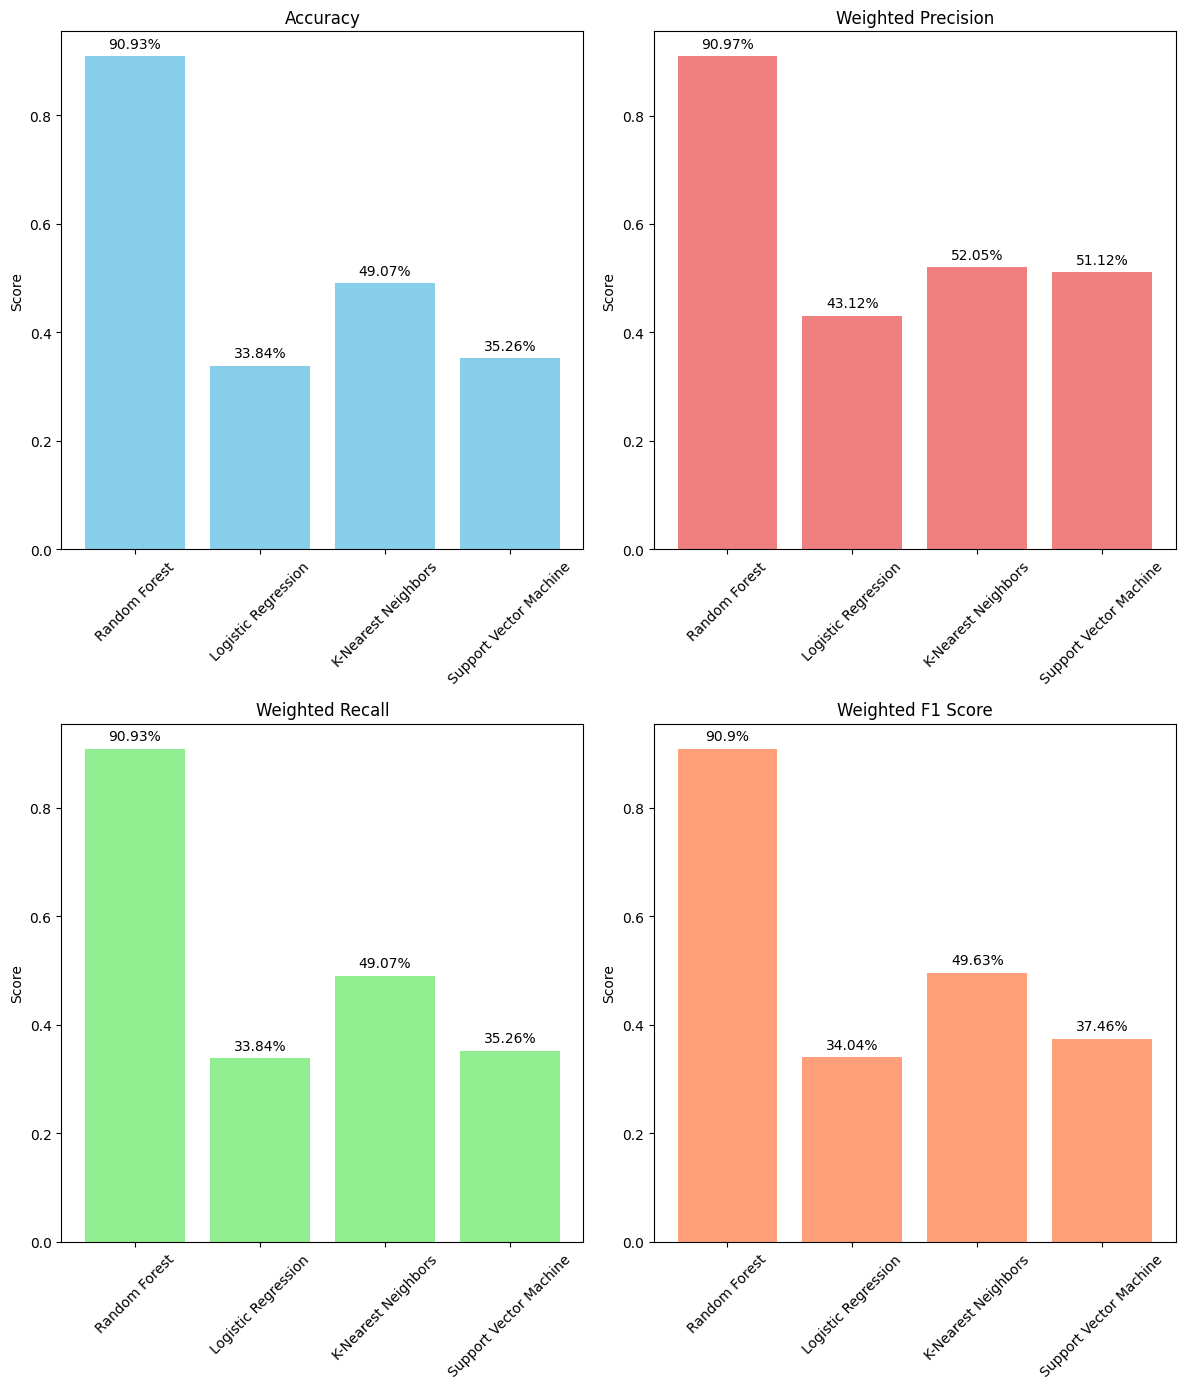

In [81]:
# Visualise the performance report
model_names = results_df['Model']
accuracies = results_df['Accuracy']
weighted_precisions = results_df['Weighted Precision']
weighted_recalls = results_df['Weighted Recall']
weighted_f1_scores = results_df['Weighted F1 Score']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 14))
fig.subplots_adjust(hspace=0.5)

# Create bar plots with data labels in percentage format
def add_data_labels(ax, is_percentage=False):
    for i, v in enumerate(ax.patches):
        if is_percentage:
            label = f'{round(v.get_height() * 100, 2)}%'  # Format as percentage
        else:
            label = str(round(v.get_height(), 3))
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, label, ha='center', va='bottom')

axs[0, 0].bar(model_names, accuracies, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Score')
axs[0, 0].tick_params(axis='x', rotation=45)
add_data_labels(axs[0, 0], is_percentage=True)  # Display as percentage

axs[0, 1].bar(model_names, weighted_precisions, color='lightcoral')
axs[0, 1].set_title('Weighted Precision')
axs[0, 1].set_ylabel('Score')
axs[0, 1].tick_params(axis='x', rotation=45)
add_data_labels(axs[0, 1], is_percentage=True)  # Display as percentage

axs[1, 0].bar(model_names, weighted_recalls, color='lightgreen')
axs[1, 0].set_title('Weighted Recall')
axs[1, 0].set_ylabel('Score')
axs[1, 0].tick_params(axis='x', rotation=45)
add_data_labels(axs[1, 0], is_percentage=True)  # Display as percentage

axs[1, 1].bar(model_names, weighted_f1_scores, color='lightsalmon')
axs[1, 1].set_title('Weighted F1 Score')
axs[1, 1].set_ylabel('Score')
axs[1, 1].tick_params(axis='x', rotation=45)
add_data_labels(axs[1, 1], is_percentage=True)  # Display as percentage

plt.tight_layout()
plt.show()

**Interpretation**

**1. Random Forest:**
* **Accuracy:** This model achieved a high accuracy of approximately 90.93%, indicating that it correctly predicted the region labels for the test data in almost 91% of the cases.
* **Weighted Precision:** The weighted precision score is also high at around 90.97%. This indicates that when the model predicts a region label, it is accurate about 90.97% of the time across all regions.
* **Weighted Recall:** The weighted recall score is around 90.93%, suggesting that the model correctly identifies about 90.93% of the actual positive cases for all regions.
* **Weighted F1 Score:** The weighted F1 score is approximately 90.90%. The F1 score combines both precision and recall and provides a balanced measure of the model's overall performance.

**2. Logistic Regression:**
* **Accuracy:** The logistic regression model has a relatively low accuracy of about 33.84%. This indicates that it struggled to correctly predict the region labels, achieving accuracy in only about 33.84% of cases.
* **Weighted Precision:** The weighted precision score is around 43.12%, meaning that when the model predicts a region label, it is accurate about 43.12% of the time across all regions. However, this is still lower than desired.
* **Weighted Recall:** The weighted recall score is also approximately 33.84%, indicating that the model correctly identifies about 33.84% of the actual positive cases for all regions.
* **Weighted F1 Score:** The weighted F1 score is about 34.04%, which is a balanced measure of precision and recall, and it reflects the model's overall performance.

**3. K-Nearest Neighbors:**
* **Accuracy:** This model achieved an accuracy of around 49.07%, which is higher than logistic regression but lower than the random forest.
* **Weighted Precision:** The weighted precision score is about 52.05%, indicating that it is more accurate than logistic regression, with an accuracy of 52.05% across all regions.
* **Weighted Recall:** The weighted recall score is approximately 49.07%, indicating that the model correctly identifies about 49.07% of the actual positive cases for all regions.
* **Weighted F1 Score:** The weighted F1 score is around 49.63%, which is a balanced measure of precision and recall, reflecting the model's overall performance.

**4. Support Vector Machine:**
* **Accuracy:** The support vector machine model achieved an accuracy of about 35.26%, which is the lowest among the models evaluated.
* **Weighted Precision:** The weighted precision score is around 51.12%, indicating that it is relatively accurate, with an accuracy of 51.12% across all regions.
* **Weighted Recall:** The weighted recall score is approximately 35.26%, suggesting that the model correctly identifies about 35.26% of the actual positive cases for all regions.
* **Weighted F1 Score:** The weighted F1 score is about 37.46%, which combines precision and recall, providing an overall assessment of the model's performance.

*In summary, the **random forest model** outperforms the other three models in terms of accuracy and overall weighted performance metrics, followed by the K-Nearest Neighbors model. The logistic regression and support vector machine models show lower accuracy and performance across all metrics, with the logistic regression model being the least accurate among the four.*

# Test for Over fitting

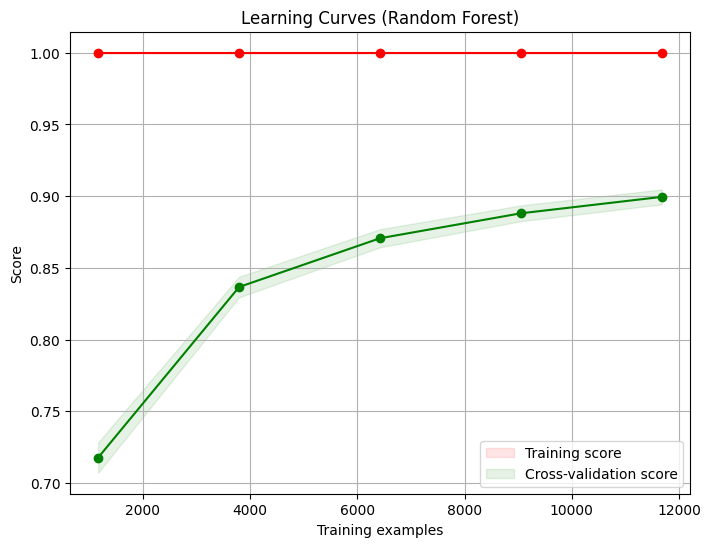

Training Accuracy: 1.0000
Test Accuracy: 0.9066


In [83]:
# Define machine learning model (e.g., Random Forest)
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r", label="Training score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g", label="Cross-validation score")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g")

    plt.legend(loc="best")
    return plt

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a learning curve plot
title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

# Evaluate model performance on training and test data
estimator.fit(X_train, y_train)
y_train_pred = estimator.predict(X_train)
y_test_pred = estimator.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plot learning curves and show accuracy scores
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

* The test accuracy of approximately 90.93% is the more reliable indicator of how well the model will perform on new and unseen data.
* The test accuracy of 90.66% is very close to the training accuracy of 100%. This closeness in performance between the training and test datasets is a positive sign. It suggests that the model is generalizing well to unseen data, which is a key indicator that overfitting is not a major issue. 

### Cross Validation on Random Forest 

In [84]:
# Define your machine learning model (Random Forest)
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(estimator, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the results
print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

Mean Cross-Validation Score: 0.9001301815690305
Standard Deviation of Cross-Validation Scores: 0.007680537988934426


*The mean cross-validation score for the **Random Forest model** is approximately 0.9001, and the standard deviation of the cross-validation scores is approximately 0.0077. This suggests that the model's performance remains consistent across different folds of the data, and the small standard deviation indicates that the model is not overfitting. Therefore, we can reasonably conclude that the Random Forest model is performing well and does not exhibit significant overfitting.*

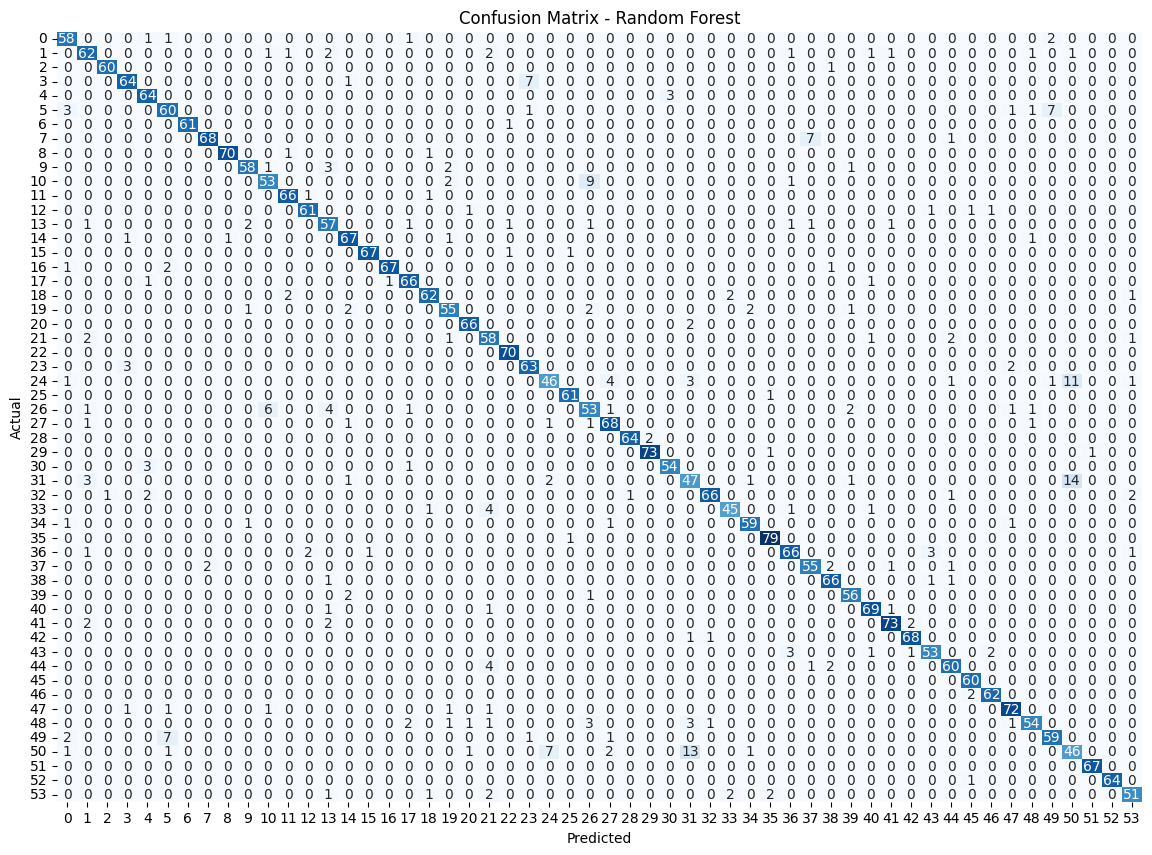

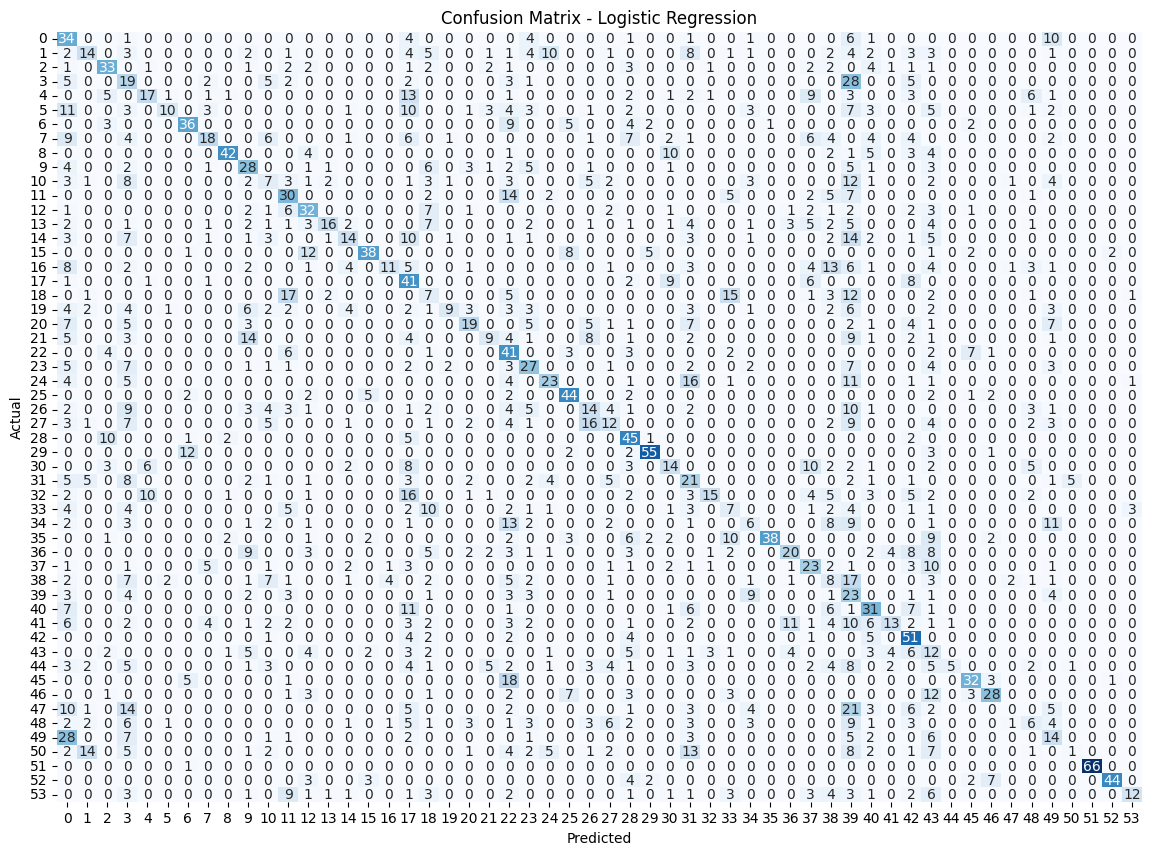

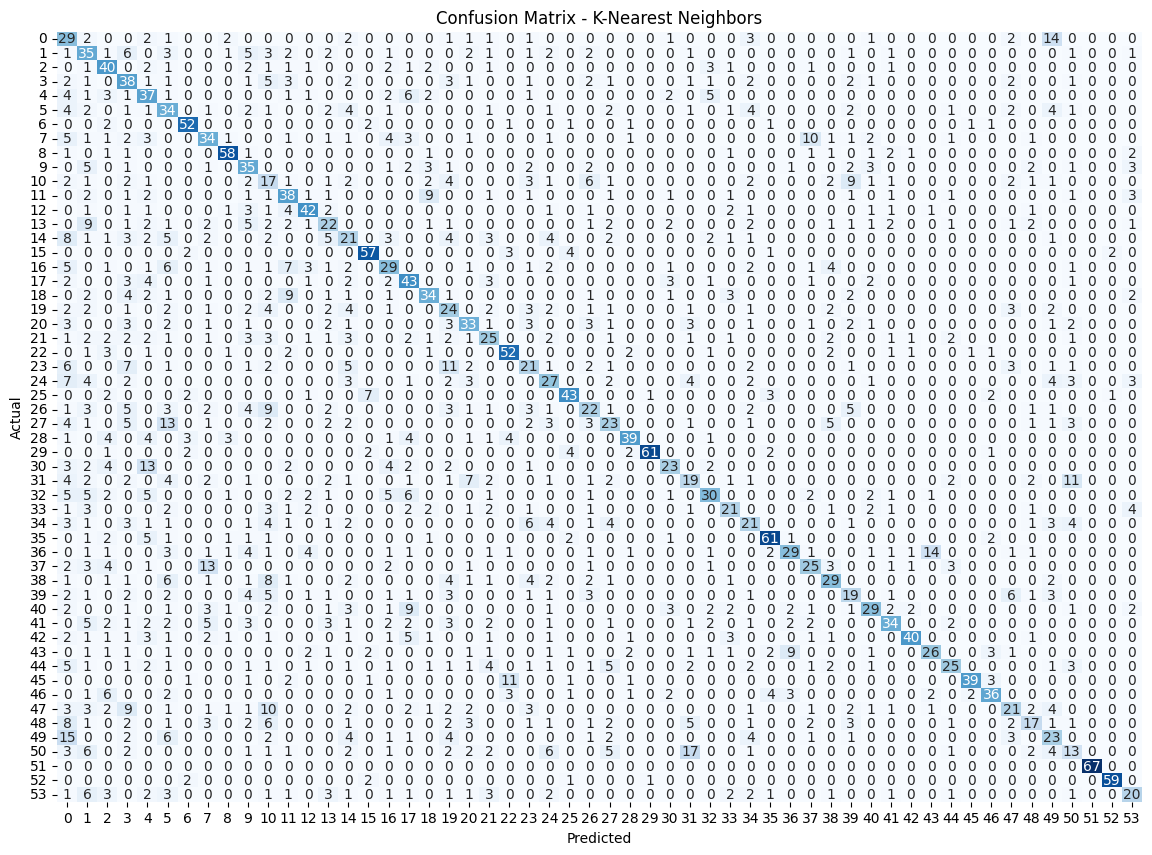

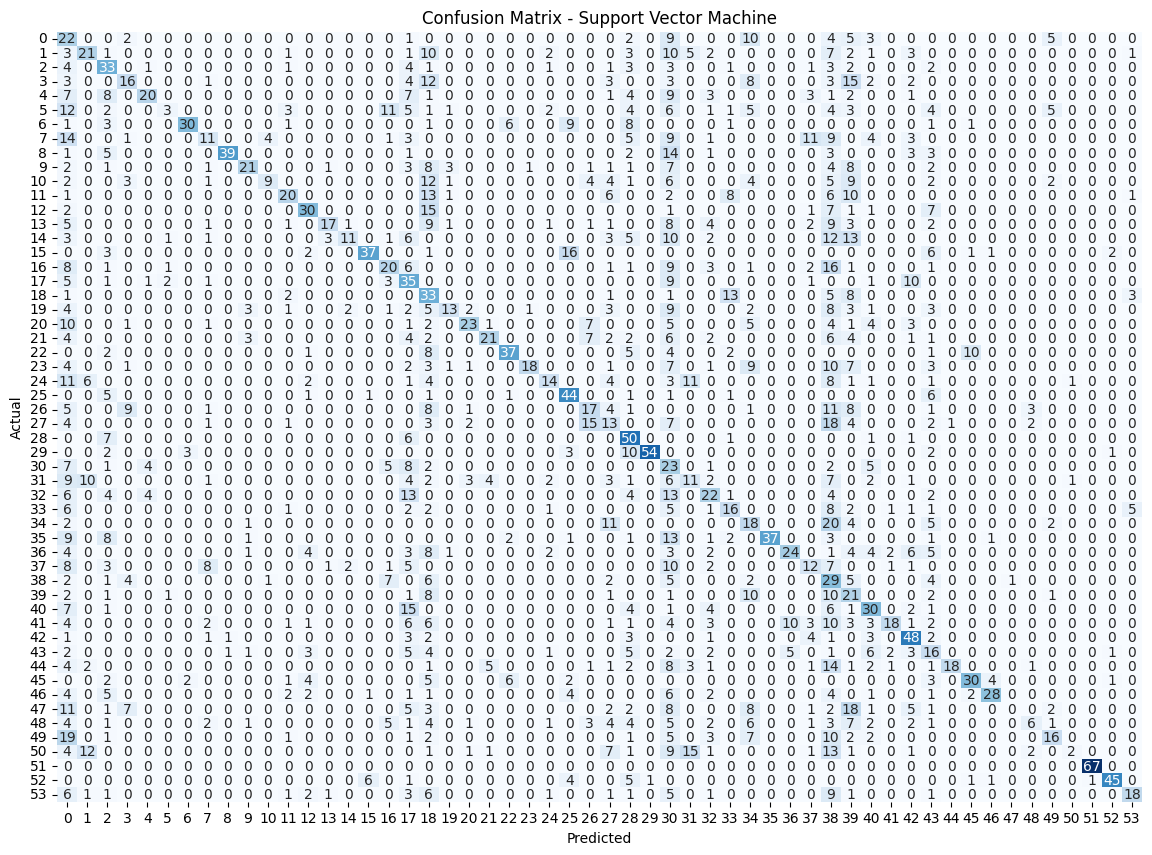

In [77]:
# Plot confusion matrices
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    confusion = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


# Conclusion and Recommedation

**Conclusion:**
Based on the evaluation of various machine learning models for the classification task, it is evident that the Random Forest model outperforms other models with an accuracy of approximately 90.93%. This model also exhibits good weighted precision, recall, and F1 score, indicating its ability to classify the data effectively. Moreover, the model does not show signs of overfitting, as demonstrated by consistent performance across cross-validation folds.

**Recommendation:**
Considering the Random Forest model's strong performance and robustness, it is recommended for use in this classification task. However, further optimization and fine-tuning of hyperparameters could potentially enhance its performance even more. Additionally, it would be beneficial to monitor the model's performance over time to ensure its continued effectiveness, as real-world data distributions can change. Furthermore, collecting more data or engineering additional features may improve the model's accuracy and generalization capabilities.

In summary, the Random Forest model is a reliable choice for this classification task, but continuous monitoring and potential enhancements are advisable for long-term success.

# Regression Task

### Regression Task: Predicting Avocado Average Price

In this task, the aim is to predict the average price of avocados, which is a continuous numerical value.

In [389]:
# Create a copy of the original data for preprocessing
data_reg = data.copy()

In [390]:
# Drop unnecessary columns
columns_to_drop = ['Date', 'Small Bags','Large Bags','XLarge Bags']
data_reg = data_reg.drop(columns=columns_to_drop)

* *We are removing the "Small Bags," "Large Bags," and "XLarge Bags" columns from the dataset for the regression task. Since the "Total Bags" column already represents the sum of these three columns, including all of them might introduce multicollinearity and redundancy in your regression model. Multicollinearity can make it challenging to interpret the model coefficients and can affect the model's stability.*
* *Removing these columns can simplify the regression analysis and reduce the risk of overfitting.*

In [392]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [393]:
data_reg.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags          year  
count  1.824900e+04  18249.000000  
mean   2.396392e+05   2016.147899  
std    9.862424e+05      0.939938  
min    0.000000e+00   2015.000000  
25%    5.088640e+03   2015.000000  
50%    3.974383e+04   2016.000000  
75%    1.107834e+05   2017.000000  
max    1.937313e+07   2018.000000

In [394]:
data_reg

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

               type  year            region  
0      conventional  2015            Albany  
1      conventional  2015            Albany  
2      conventional  2015            Albany  
3      conventional  2015            Albany  
4      conventional  2015            Albany  
...             ...   ...               ...  
18244       organic  2018  WestTexNewMexico  
18245       organic  2018  WestTexNewMexico  
18246       organic  2018  WestTexNewMexico  
18247       organic  2018  WestTexNewMexico  
18248       organic  2018  WestTexNewMexico  

[18249 rows x 9 columns]

# Data Preparation

### Handling Outliers 

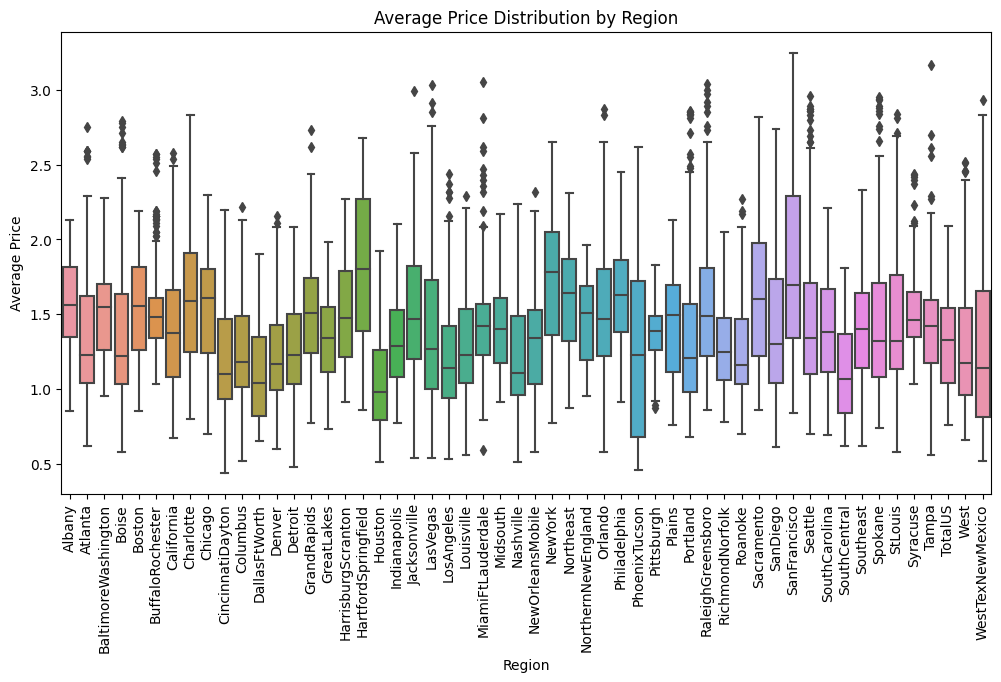

In [395]:
# Explore relationships between numerical features and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='AveragePrice', data=data_reg)
plt.title('Average Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

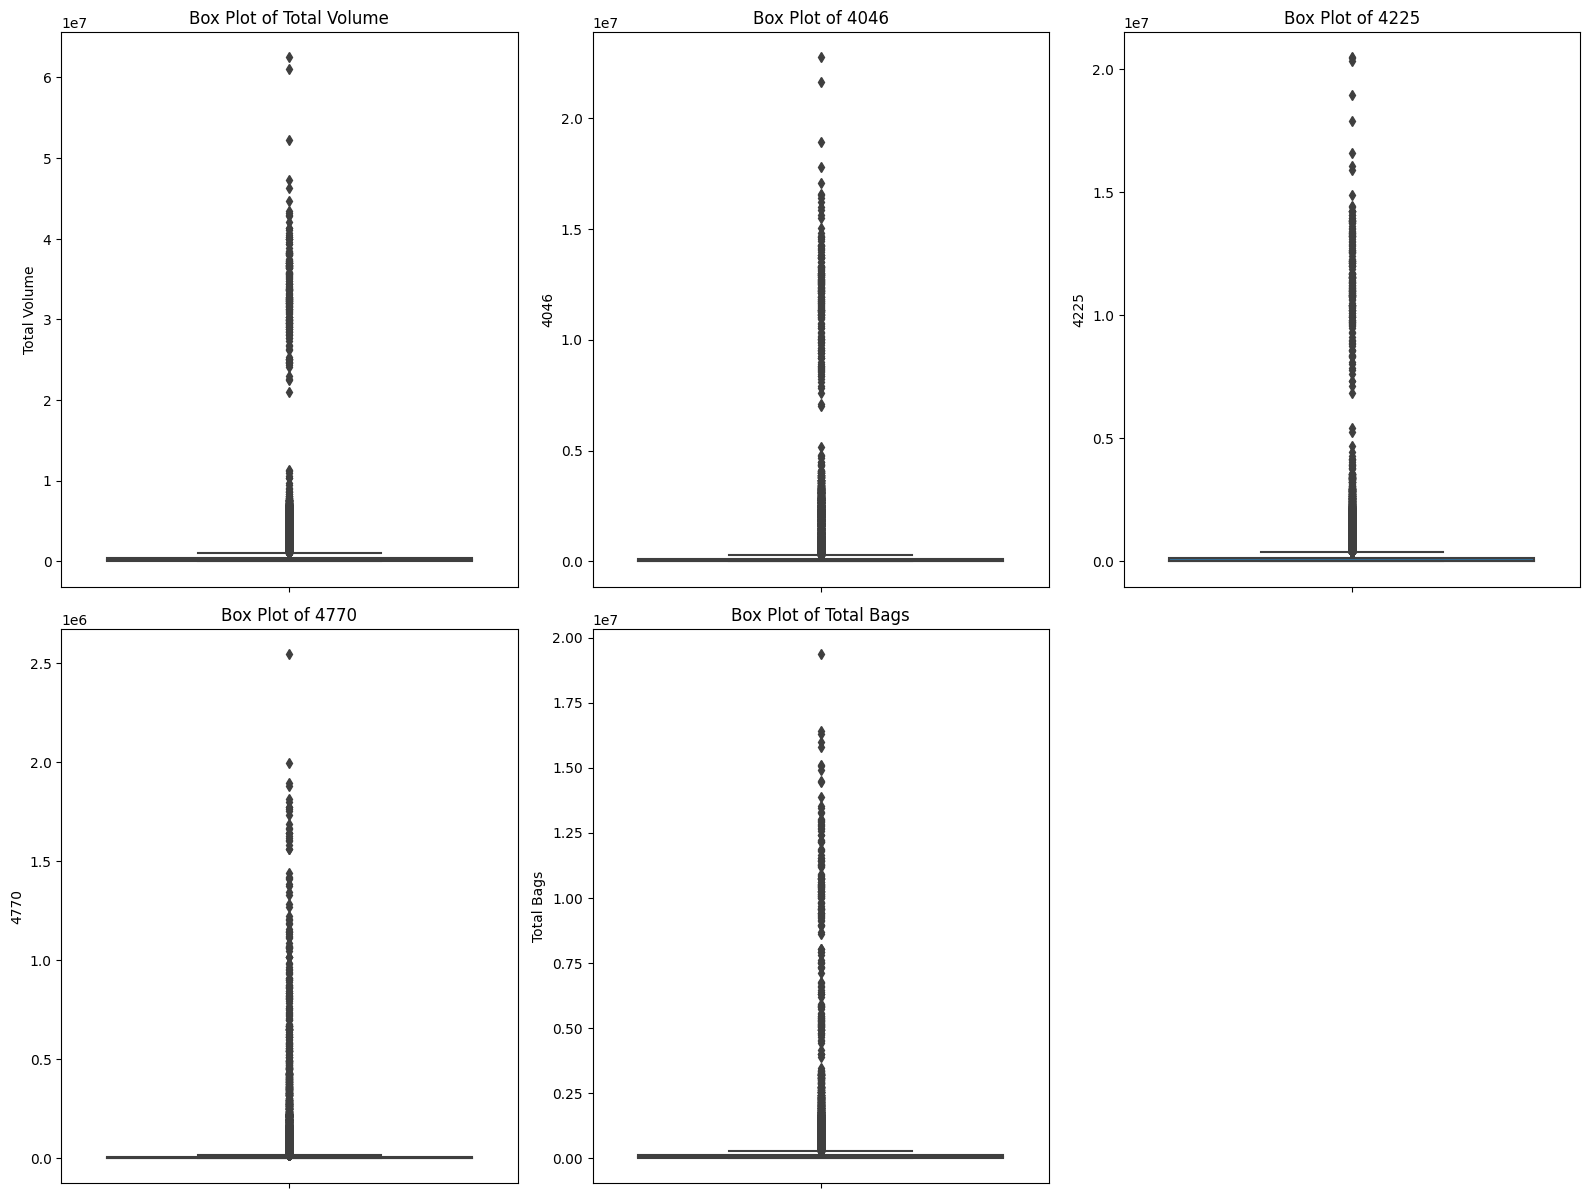

In [399]:
# Select numerical columns
numerical_columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags']

# Create subplots for each numerical column
plt.figure(figsize=(16, 18))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data_reg, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [400]:
# Create a dictionary to store the count of outliers for each column
outlier_counts = {}

# Define a function to count outliers using IQR method
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Count outliers for each numerical column
for column in numerical_columns:
    outlier_count = count_outliers(data_reg, column)
    outlier_counts[column] = outlier_count

# Print the counts of outliers
for column, count in outlier_counts.items():
    print(f'Column "{column}" has {count} outliers.')

# Total number of outliers
total_outliers = sum(outlier_counts.values())
print(f'Total number of outliers in all columns: {total_outliers}')

Column "Total Volume" has 2297 outliers.
Column "4046" has 2518 outliers.
Column "4225" has 2519 outliers.
Column "4770" has 2918 outliers.
Column "Total Bags" has 2533 outliers.
Total number of outliers in all columns: 12785


* A significant number of outliers in your dataset, especially in the "XLarge Bags" column

In [407]:
# Create a copy of the original DataFrame
data_reg_cleaned = data_reg.copy()

# Define a function to handle outliers using Tukey's fences method
def handle_outliers_tukey(df, column, k=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - k * IQR
    upper_fence = Q3 + k * IQR
    df[column] = np.where((df[column] < lower_fence) | (df[column] > upper_fence), df[column].median(), df[column])

# List of numerical columns with outliers to handle (exclude 'AveragePrice')
numerical_columns_with_outliers = ['Total Volume', '4046', '4225', '4770', 'Total Bags']

# Apply outlier handling to each numerical column
for column in numerical_columns_with_outliers:
    handle_outliers_tukey(data_reg_cleaned, column)

# Now, data_reg_cleaned contains the DataFrame with outliers handled using Tukey's fences method,
# and 'AveragePrice' is excluded from this process.


In [410]:
# Define a function to handle outliers using Tukey's fences method with a lower k value (e.g., k=0.5)
def handle_outliers_tukey(df, column, k=1.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - k * IQR
    upper_fence = Q3 + k * IQR
    df[column] = np.where((df[column] < lower_fence) | (df[column] > upper_fence), df[column].median(), df[column])

# List of numerical columns with outliers to handle (exclude 'AveragePrice')
# numerical_columns_with_outliers = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Apply Tukey's fences method with a lower k value to each numerical column
for column in numerical_columns_with_outliers:
    handle_outliers_tukey(data_reg_cleaned, column)


In [411]:
# Create a dictionary to store the count of outliers for each column
outlier_counts = {}

# Define a function to count outliers using IQR method
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Count outliers for each numerical column
for column in numerical_columns_with_outliers:
    outlier_count = count_outliers(data_reg_cleaned, column)
    outlier_counts[column] = outlier_count

# Print the counts of outliers
for column, count in outlier_counts.items():
    print(f'Column "{column}" has {count} outliers.')

# Total number of outliers
total_outliers = sum(outlier_counts.values())
print(f'Total number of outliers in all columns: {total_outliers}')

Column "Total Volume" has 0 outliers.
Column "4046" has 0 outliers.
Column "4225" has 0 outliers.
Column "4770" has 0 outliers.
Column "Total Bags" has 0 outliers.
Total number of outliers in all columns: 0


In [412]:
data_reg_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [413]:
data_reg_cleaned.head()

AveragePrice  Total Volume     4046      4225    4770  Total Bags  \
0          1.33      64236.62  1036.74  54454.85   48.16     8696.87   
1          1.35      54876.98   674.28  44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  29061.02  130.50     8145.35   
3          1.08      78992.15  1132.00  29061.02   72.58     5811.16   
4          1.28      51039.60   941.48  43838.39   75.78     6183.95   

           type  year  region  
0  conventional  2015  Albany  
1  conventional  2015  Albany  
2  conventional  2015  Albany  
3  conventional  2015  Albany  
4  conventional  2015  Albany

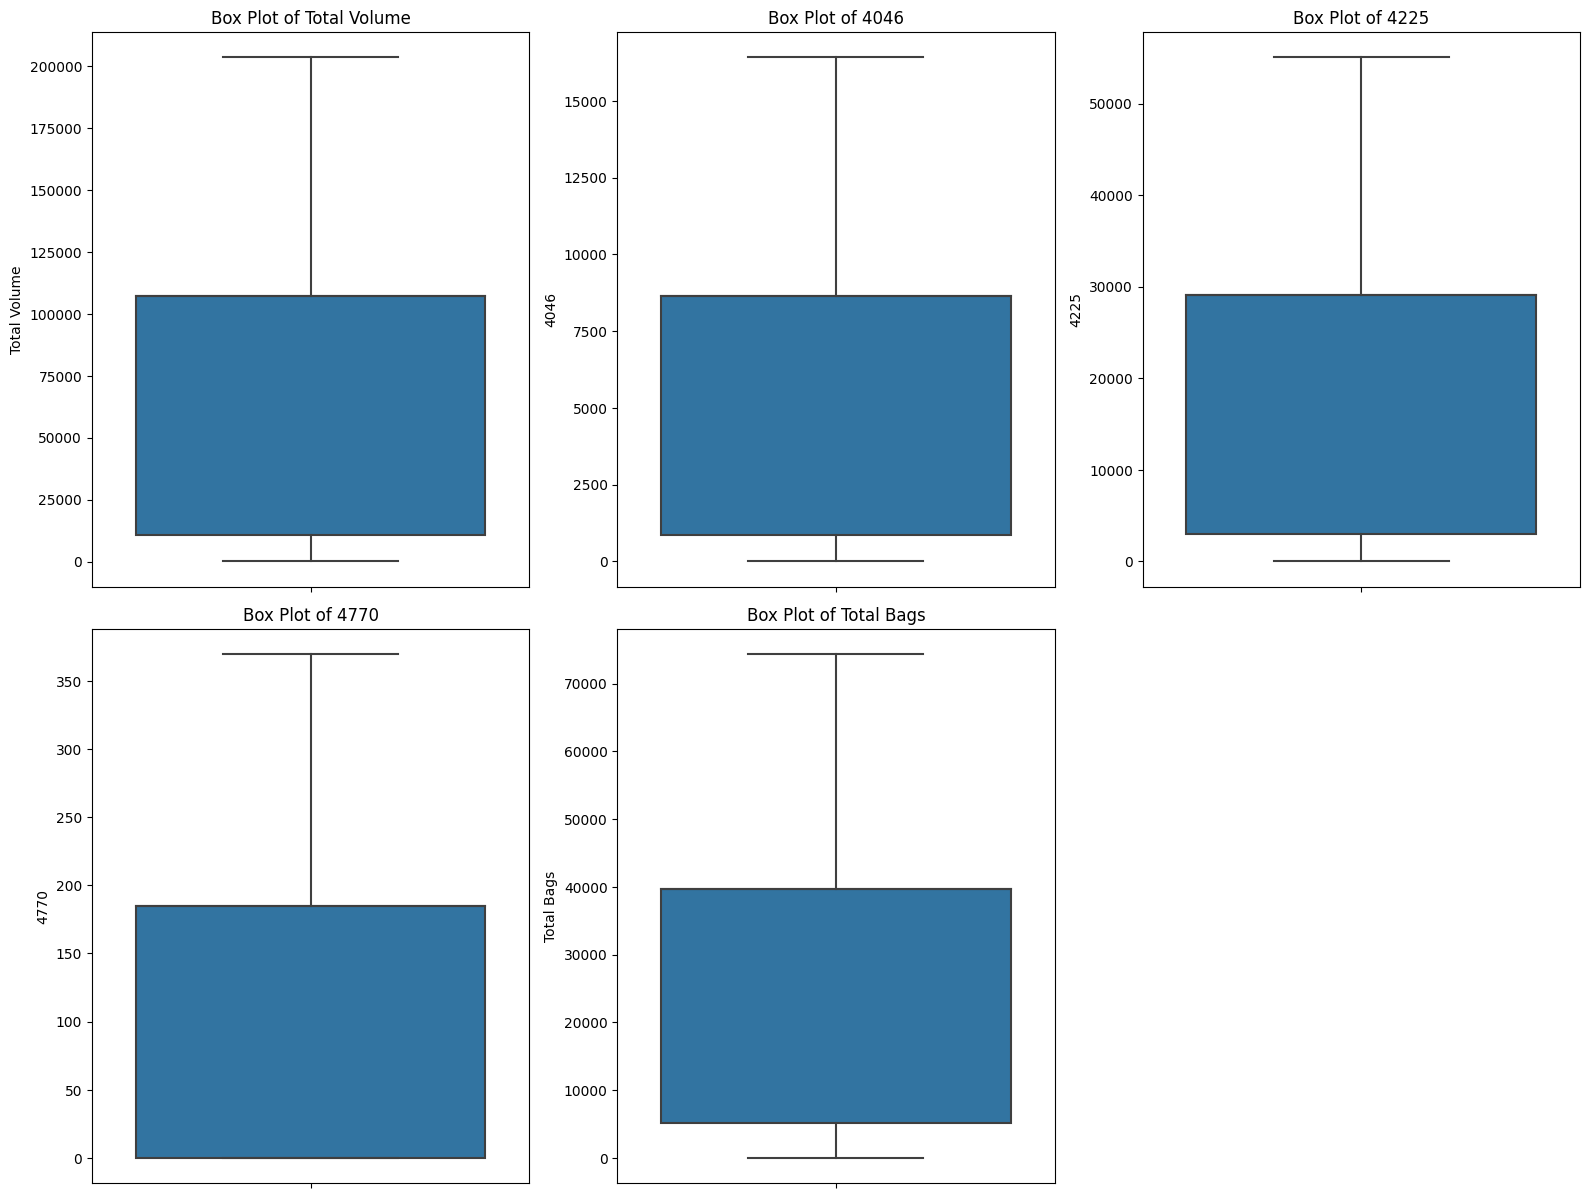

In [414]:
# Select numerical columns
# numerical_columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Create subplots for each numerical column
plt.figure(figsize=(16, 18))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data_reg_cleaned, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [423]:
# Summary statistics
summary = data_reg_cleaned.describe()
summary


AveragePrice   Total Volume          4046          4225          4770  \
count  18249.000000   18249.000000  18249.000000  18249.000000  18249.000000   
mean       1.405978   70393.278847   5370.087063  18887.130084    108.148575   
std        0.402677   53139.080606   4028.675668  14483.571748     92.477062   
min        0.440000      84.560000      0.000000      0.000000      0.000000   
25%        1.100000   10838.580000    854.070000   3008.780000      0.000000   
50%        1.370000  107376.760000   8645.300000  29061.020000    184.990000   
75%        1.660000  107376.760000   8645.300000  29061.020000    184.990000   
max        3.250000  203681.710000  16424.040000  55055.640000    369.810000   

         Total Bags          year  
count  18249.000000  18249.000000  
mean   27163.920103   2016.147899  
std    20459.815865      0.939938  
min        0.000000   2015.000000  
25%     5088.640000   2015.000000  
50%    39743.830000   2016.000000  
75%    39743.830000   2017.000000  
max    74392.690000   2018.000000

In [427]:
# Perform one-hot encoding for the "type" and "region" columns
data_reg_encoded = pd.get_dummies(data_reg_cleaned, columns=["type", "region"])

# Display the first few rows of the encoded dataset
data_reg_encoded.head()


AveragePrice  Total Volume     4046      4225    4770  Total Bags  year  \
0          1.33      64236.62  1036.74  54454.85   48.16     8696.87  2015   
1          1.35      54876.98   674.28  44638.81   58.33     9505.56  2015   
2          0.93     118220.22   794.70  29061.02  130.50     8145.35  2015   
3          1.08      78992.15  1132.00  29061.02   72.58     5811.16  2015   
4          1.28      51039.60   941.48  43838.39   75.78     6183.95  2015   

   type_conventional  type_organic  region_Albany  ...  region_SouthCarolina  \
0                  1             0              1  ...                     0   
1                  1             0              1  ...                     0   
2                  1             0              1  ...                     0   
3                  1             0              1  ...                     0   
4                  1             0              1  ...                     0   

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                    0                 0               0               0   
1                    0                 0               0               0   
2                    0                 0               0               0   
3                    0                 0               0               0   
4                    0                 0               0               0   

   region_Syracuse  region_Tampa  region_TotalUS  region_West  \
0                0             0               0            0   
1                0             0               0            0   
2                0             0               0            0   
3                0             0               0            0   
4                0             0               0            0   

   region_WestTexNewMexico  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 63 columns]

# EDA

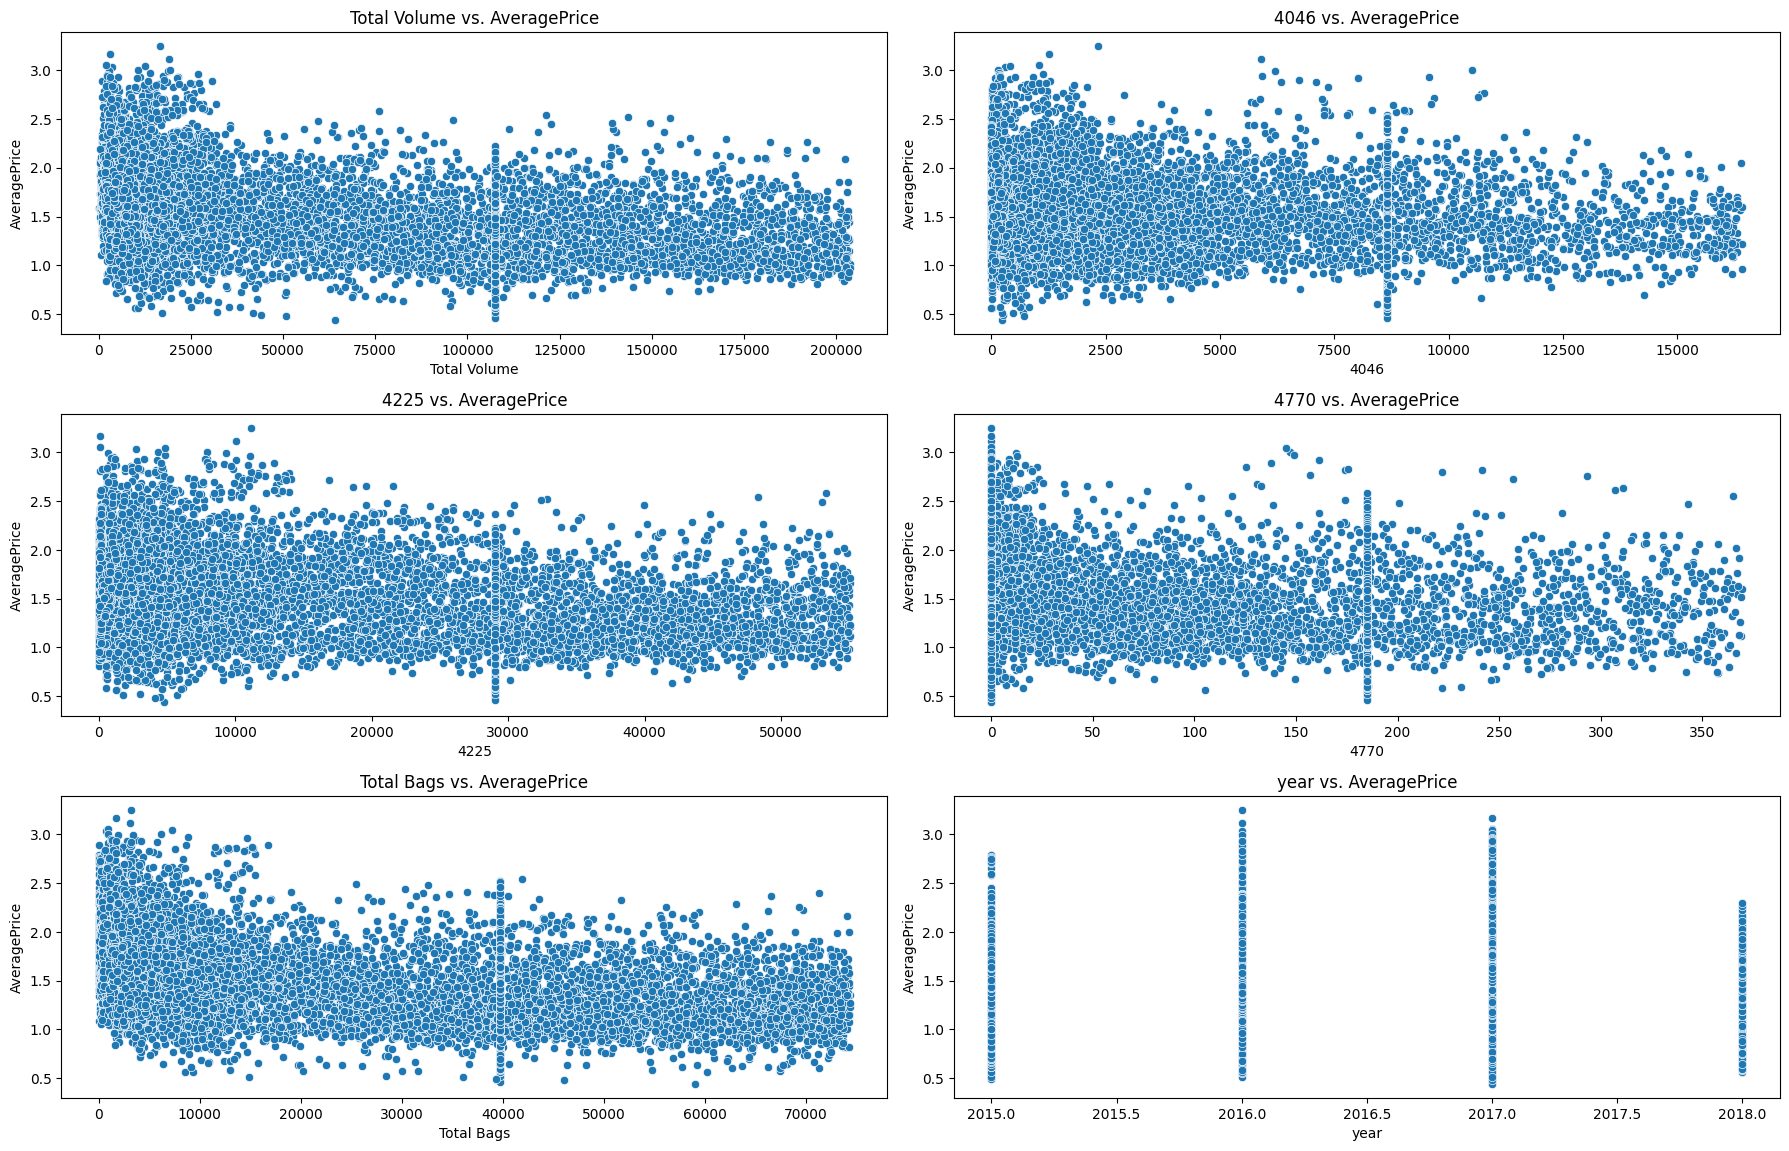

In [425]:
# Select the features you want to visualize (excluding the target variable)
numerical_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'year']

# Set the number of columns for subplots
num_cols = 2
num_rows = len(numerical_features) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))

# Flatten the axes array for easier indexing
axes = axes.ravel()

# Create scatter plots for each numerical feature vs. AveragePrice
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=data_reg_cleaned, x=feature, y='AveragePrice', ax=axes[i])
    axes[i].set_title(f'{feature} vs. AveragePrice')

# Remove any empty subplots
for i in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

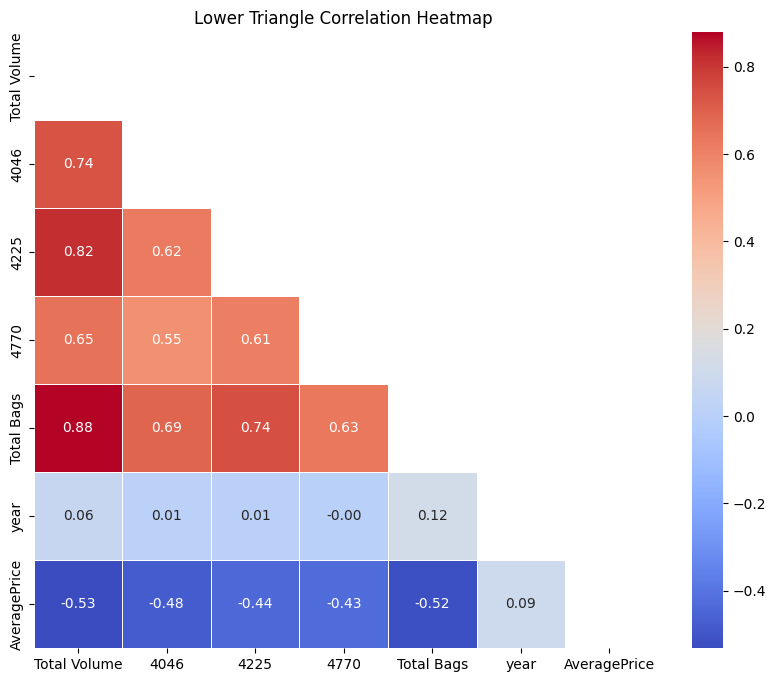

Total Volume      4046      4225      4770  Total Bags  \
Total Volume      1.000000  0.735347  0.823442  0.650416    0.879026   
4046              0.735347  1.000000  0.624724  0.553932    0.688888   
4225              0.823442  0.624724  1.000000  0.612848    0.744116   
4770              0.650416  0.553932  0.612848  1.000000    0.631384   
Total Bags        0.879026  0.688888  0.744116  0.631384    1.000000   
year              0.060892  0.009217  0.007755 -0.002880    0.116255   
AveragePrice     -0.532242 -0.477764 -0.442247 -0.432930   -0.518559   

                  year  AveragePrice  
Total Volume  0.060892     -0.532242  
4046          0.009217     -0.477764  
4225          0.007755     -0.442247  
4770         -0.002880     -0.432930  
Total Bags    0.116255     -0.518559  
year          1.000000      0.093197  
AveragePrice  0.093197      1.000000

In [426]:
# Select numerical features (excluding categorical features)
numerical_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'year']

# Calculate correlation matrix
correlation_matrix = data_reg_cleaned[numerical_features + ['AveragePrice']].corr()

# Create a lower triangle mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a lower triangle heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Lower Triangle Correlation Heatmap')
plt.show()

correlation_matrix

**1. Total Volume vs. Other Features:**
* "Total Volume" has a strong positive correlation with "4046" (0.7353), "4225" (0.8234), and "Total Bags" (0.8790). This suggests that as the total volume of avocados increases, the volumes of different avocado types ("4046," "4225") and the total bags also tend to increase.
* "Total Volume" has a moderate positive correlation with "4770" (0.6504), indicating that it is also positively related to the volume of "4770" avocados, although slightly less strongly.

**2. 4046 vs. Other Features:**
* "4046" has a strong positive correlation with "Total Volume" (0.7353), "4225" (0.6247), "Total Bags" (0.6889), and a moderate correlation with "4770" (0.5539). This suggests that as the volume of "4046" avocados increases, the volumes of other avocado types, total bags, and total volume tend to increase as well.

**3. 4225 vs. Other Features:**
* "4225" has a strong positive correlation with "Total Volume" (0.8234), "Total Bags" (0.7441), and a moderate correlation with "4046" (0.6247) and "4770" (0.6128). This indicates a positive relationship between "4225" avocado volume and the volumes of other avocados and total bags.

**4. 4770 vs. Other Features:**
* "4770" has a moderate positive correlation with "Total Volume" (0.6504), "4046" (0.5539), and "4225" (0.6128). This suggests that as the volume of "4770" avocados increases, the volumes of other avocado types tend to increase as well.

**5. Total Bags vs. Other Features:**
* "Total Bags" has a strong positive correlation with "Total Volume" (0.8790), "4225" (0.7441), "4046" (0.6889), and a moderate correlation with "4770" (0.6314). This indicates that as the total bags of avocados increase, the volumes of different avocado types and total volume also tend to increase.

**6. Year vs. Other Features:**
* "Year" has a weak positive correlation with "Total Bags" (0.1163) and "AveragePrice" (0.0932). This suggests a very mild positive relationship between the year and the total bags or average price.

**7. AveragePrice vs. Other Features:**
* "AveragePrice" has a strong negative correlation with "Total Volume" (-0.5322), "Total Bags" (-0.5186), and moderate negative correlations with "4046" (-0.4778), "4225" (-0.4422), and "4770" (-0.4329). This implies that as the average price of avocados increases, the volumes of different avocado types and total bags tend to decrease.

* In summary, the correlation matrix provides insights into the relationships between different features, which can be valuable for feature selection and understanding how each feature may influence the target variable, "AveragePrice." Keep in mind that correlation does not imply causation, so further analysis is needed to make causal inferences.

# Feature Selection

                       Feature  Importance
7                 type_organic    0.320696
4                   Total Bags    0.099159
6            type_conventional    0.074947
1                         4046    0.072216
5                         year    0.061174
2                         4225    0.058542
0                 Total Volume    0.049839
3                         4770    0.037188
25  region_HartfordSpringfield    0.021860
50         region_SanFrancisco    0.017012
36              region_NewYork    0.012567
41        region_PhoenixTucson    0.012543
61     region_WestTexNewMexico    0.010035
37            region_Northeast    0.007331
26              region_Houston    0.007268
12               region_Boston    0.006136
19        region_DallasFtWorth    0.006064
44             region_Portland    0.006014
53         region_SouthCentral    0.006012
31           region_Louisville    0.005735


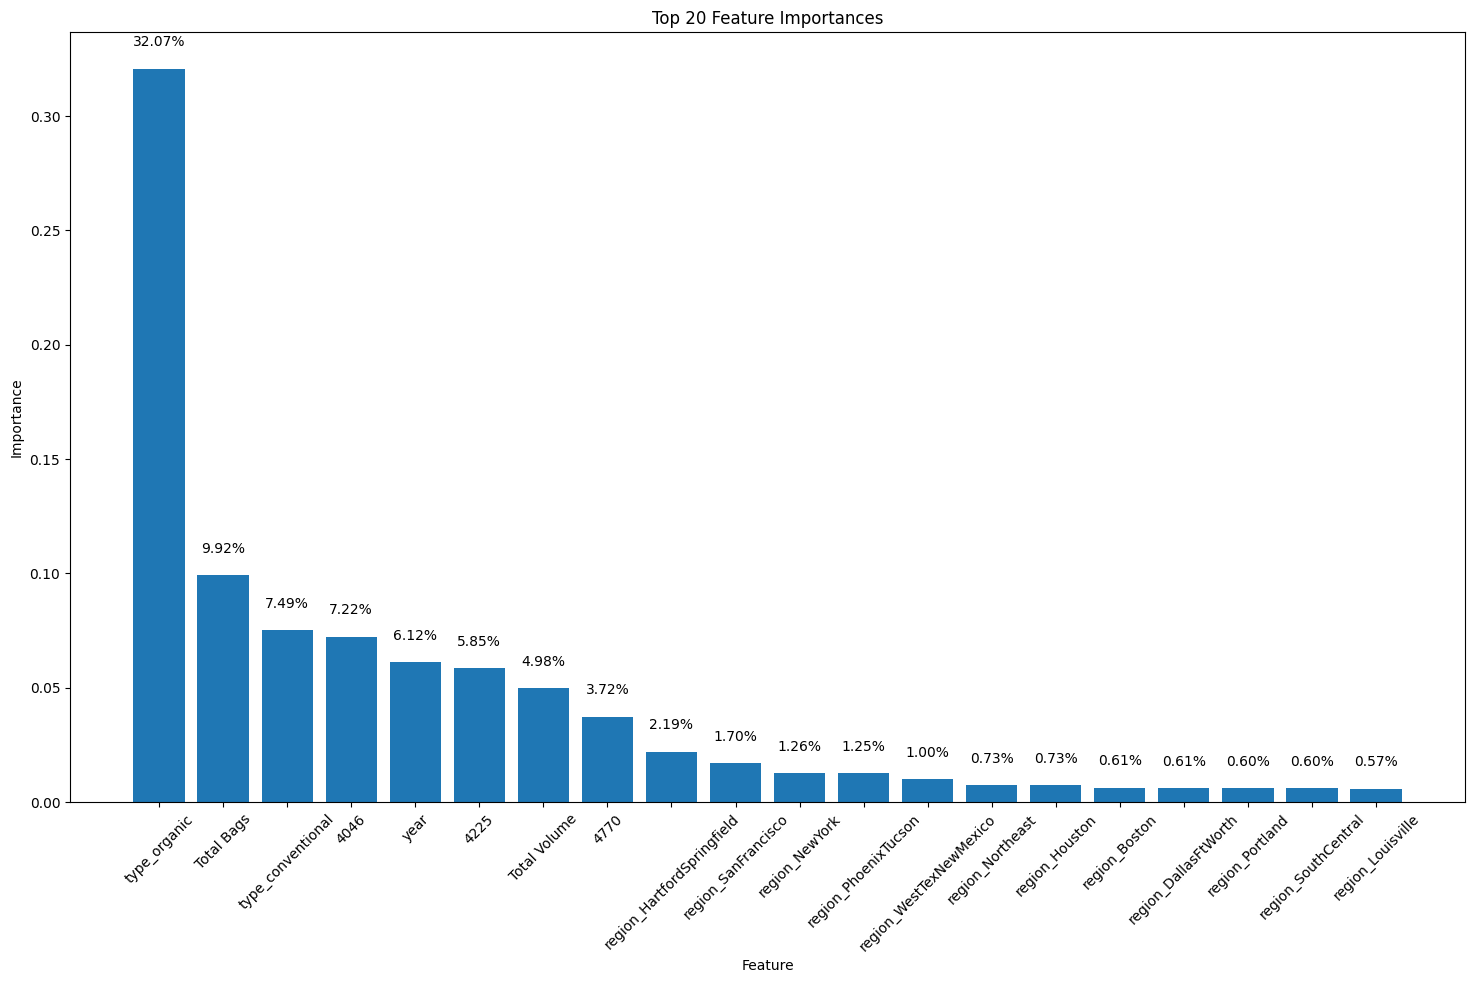

In [435]:
# Split data into X (features) and y (target variable)
X = data_reg_encoded.drop("AveragePrice", axis=1)  # Drop the target variable
y = data_reg_encoded["AveragePrice"]

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model to your data
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features (e.g., top 10)
N = 20
top_features = feature_importance_df.head(N)
print(top_features)

# Visualize feature importances with data labels in percentage form
plt.figure(figsize=(18, 10))
plt.bar(top_features['Feature'], top_features['Importance'])
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(N))

# Add data labels in percentage form
for i, val in enumerate(top_features['Importance']):
    plt.text(i, val + 0.01, f'{val*100:.2f}%', horizontalalignment='center')

plt.show()



# Regression Model 

C:\Users\JOBA\AppData\Local\Temp\ipykernel_21140\1891620366.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(results_df['Model'], rotation=45, ha="right")  # Rotate x-axis labels


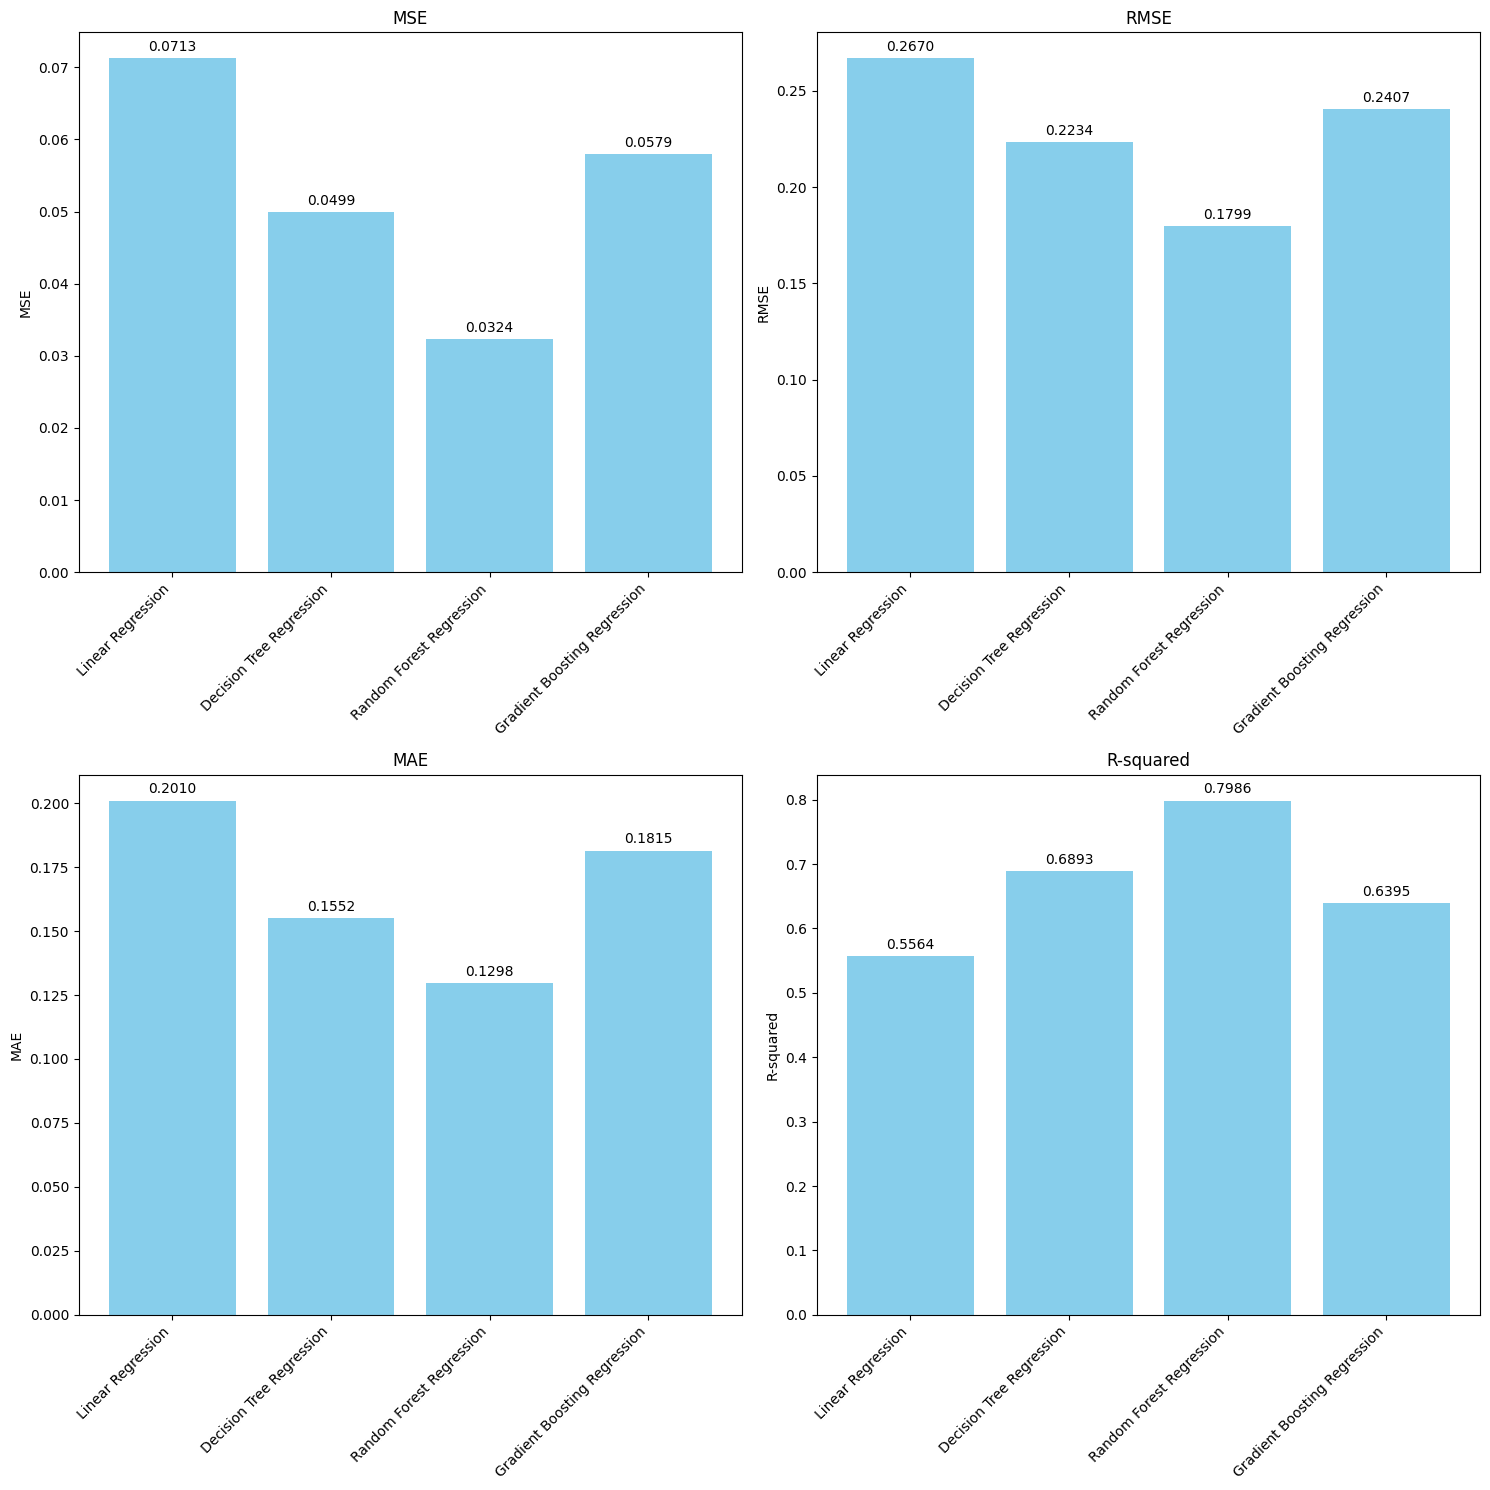

In [464]:
# Create and train regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

results = {'Model': [], 'MSE': [], 'RMSE': [], 'MAE': [], 'R-squared': []}

for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['R-squared'].append(r2)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Plot evaluation metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
metrics = ['MSE', 'RMSE', 'MAE', 'R-squared']

for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    bars = ax.bar(results_df['Model'], results_df[metric], color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xticklabels(results_df['Model'], rotation=45, ha="right")  # Rotate x-axis labels

    # Add data labels to the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',  # Format the label to 4 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [466]:
results_df

Model       MSE      RMSE       MAE  R-squared
0             Linear Regression  0.071267  0.266958  0.201019   0.556439
1      Decision Tree Regression  0.049916  0.223419  0.155184   0.689325
2      Random Forest Regression  0.032360  0.179889  0.129796   0.798591
3  Gradient Boosting Regression  0.057918  0.240661  0.181490   0.639522

The summary and interpretation of the regression models' evaluation metrics are as follows:

**Linear Regression:**
* Mean Squared Error (MSE): 0.0713 - This indicates that, on average, the squared difference between the predicted and actual values is 0.0713.
* Root Mean Squared Error (RMSE): 0.2670 - The RMSE measures the average magnitude of the errors in the model's predictions. In this case, it is 0.2670.
* Mean Absolute Error (MAE): 0.2010 - The MAE represents the average absolute difference between predicted and actual values, which is 0.2010.
* R-squared (R2): 0.5564 - The R-squared value is a measure of how well the model explains the variance in the target variable. An R2 of 0.5564 suggests that the model explains approximately 55.64% of the variance.

**Decision Tree Regression:**
* Mean Squared Error (MSE): 0.0505 - The MSE for the decision tree model is 0.0505, indicating relatively lower error compared to linear regression.
* Root Mean Squared Error (RMSE): 0.2248 - The RMSE suggests that, on average, predictions are off by approximately 0.2248 units.
* Mean Absolute Error (MAE): 0.1558 - The MAE is 0.1558, showing that the model's predictions have an average absolute difference of 0.1558 from the actual values.
* R-squared (R2): 0.6855 - The R2 of 0.6855 indicates that this model explains around 68.55% of the variance.

**Random Forest Regression:**
* Mean Squared Error (MSE): 0.0323 - The MSE is the lowest among all models, suggesting that this model has the smallest average squared prediction error.
* Root Mean Squared Error (RMSE): 0.1796 - The RMSE of 0.1796 indicates relatively low prediction errors.
* Mean Absolute Error (MAE): 0.1296 - The MAE is 0.1296, indicating a smaller average absolute difference between predicted and actual values.
* R-squared (R2): 0.7993 - The highest R2 value among all models, 0.7993, suggests that this model explains approximately 79.93% of the variance.

**Gradient Boosting Regression:**
* Mean Squared Error (MSE): 0.0579 - The MSE for the gradient boosting model is higher than that of the random forest model but lower than linear regression.
* Root Mean Squared Error (RMSE): 0.2407 - The RMSE of 0.2407 indicates moderate prediction errors.
* Mean Absolute Error (MAE): 0.1815 - The MAE is 0.1815, suggesting a moderate average absolute difference between predicted and actual values.
* R-squared (R2): 0.6396 - The R2 value of 0.6396 indicates that this model explains approximately 63.96% of the variance.

*In summary, the **Random Forest Regression model** performs the best among the four models, as it has the lowest MSE, RMSE, and MAE values, and the highest R2 value. This indicates that the random forest model provides the most accurate and explained variance in predicting average avocado prices. 

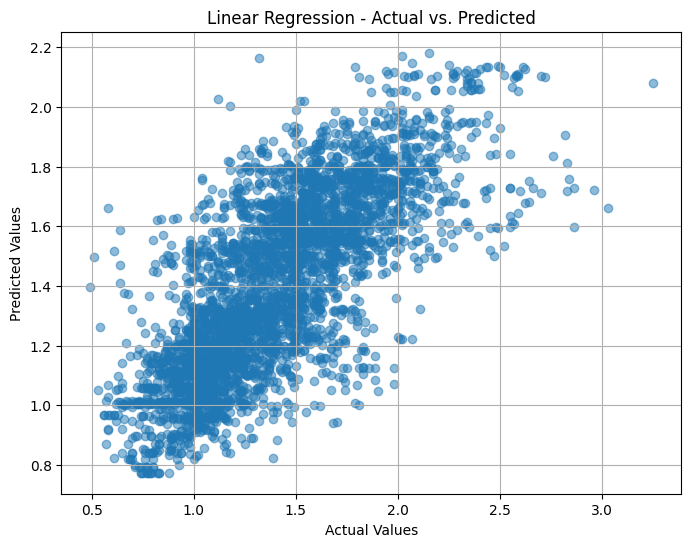

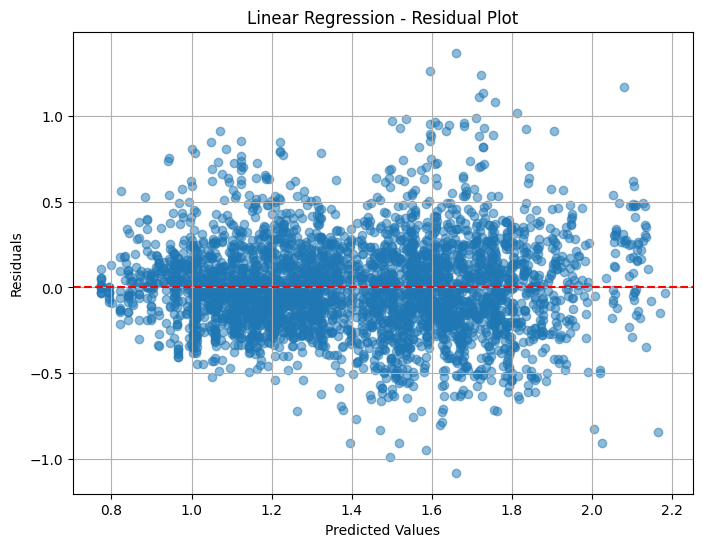

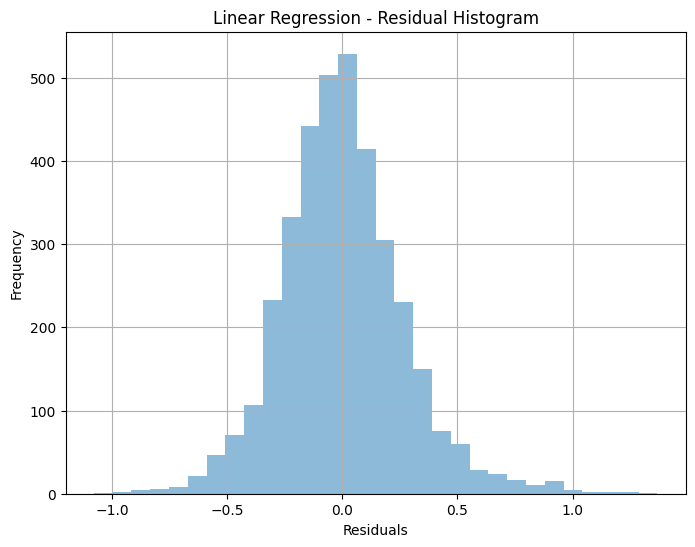

Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.0713
Root Mean Squared Error (RMSE): 0.2670
Mean Absolute Error (MAE): 0.2010
R-squared (R2): 0.5564


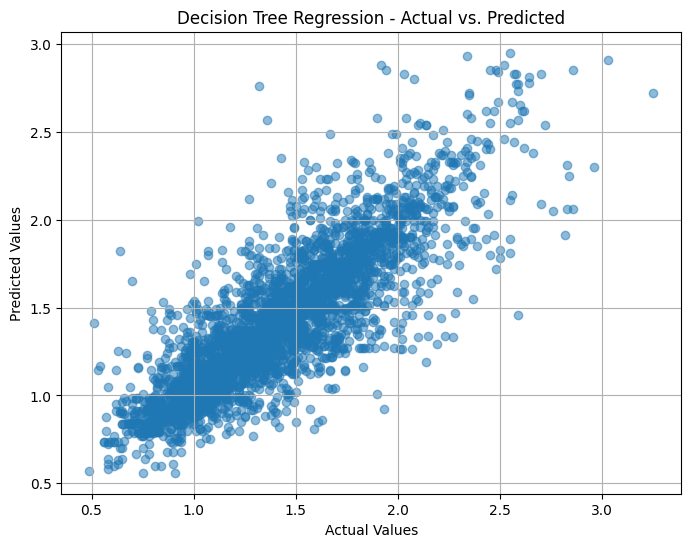

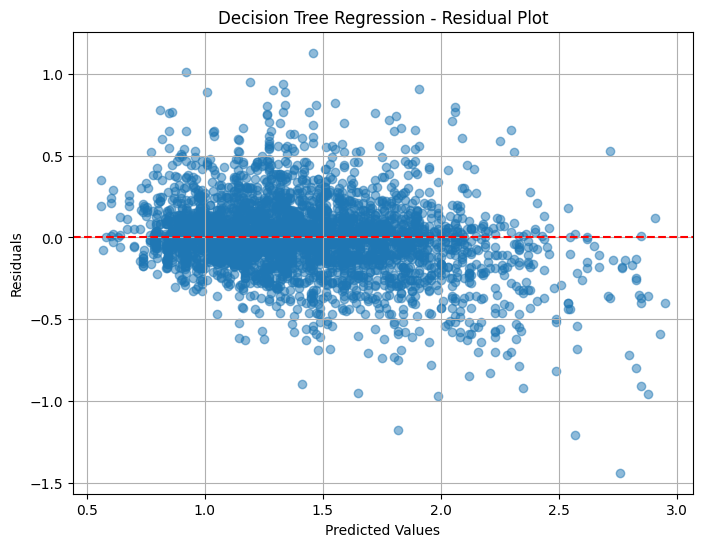

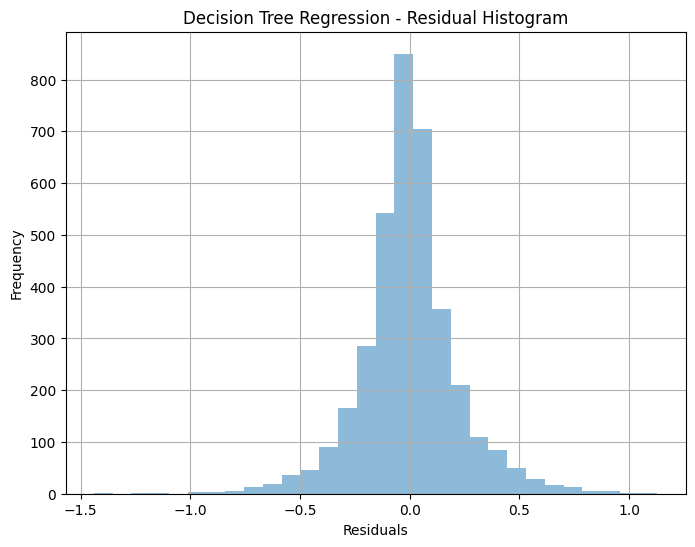

Decision Tree Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.0499
Root Mean Squared Error (RMSE): 0.2234
Mean Absolute Error (MAE): 0.1552
R-squared (R2): 0.6893


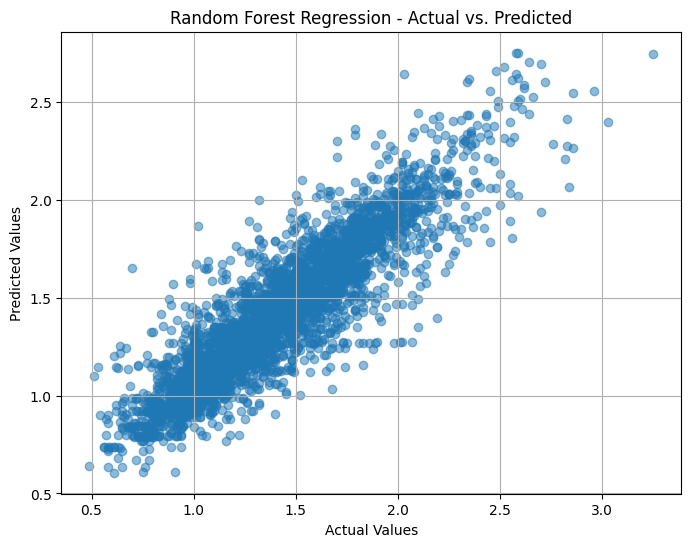

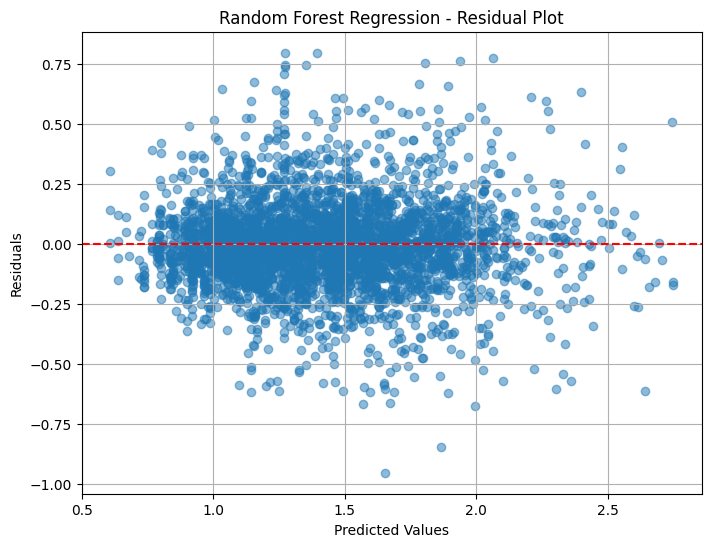

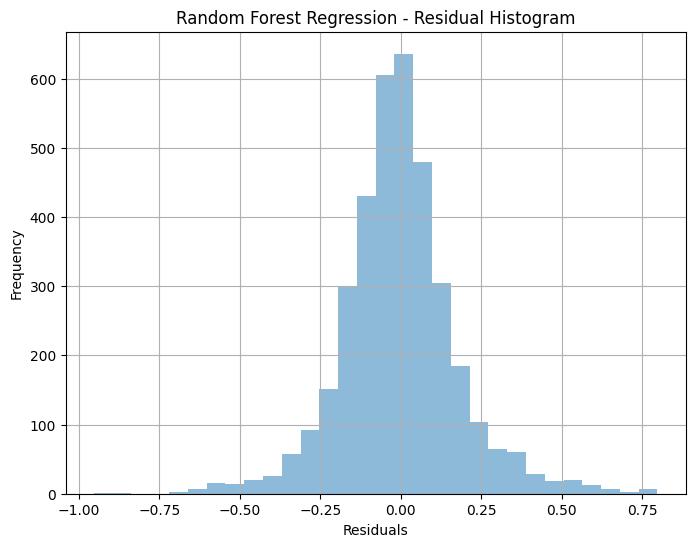

Random Forest Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.0324
Root Mean Squared Error (RMSE): 0.1799
Mean Absolute Error (MAE): 0.1298
R-squared (R2): 0.7986


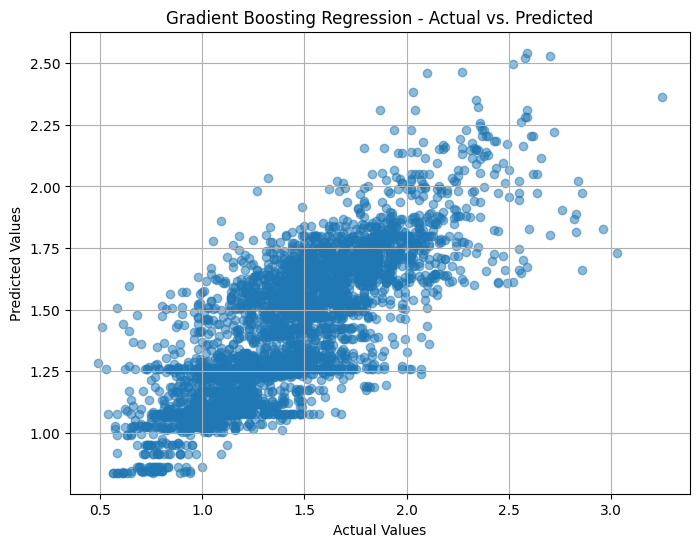

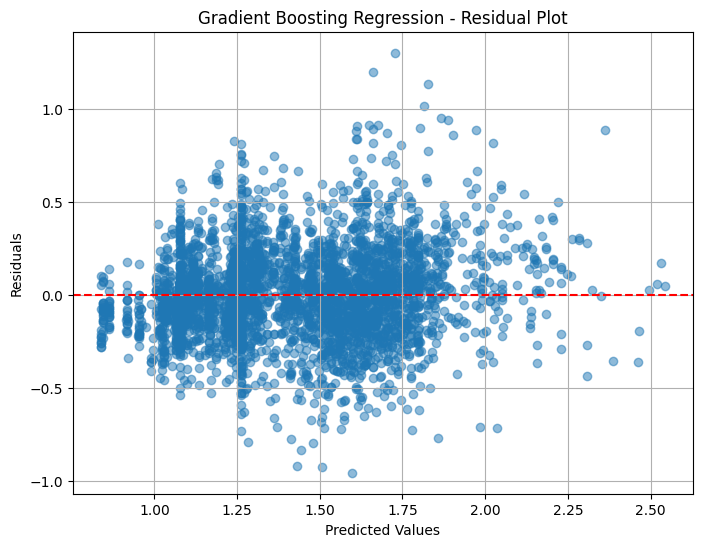

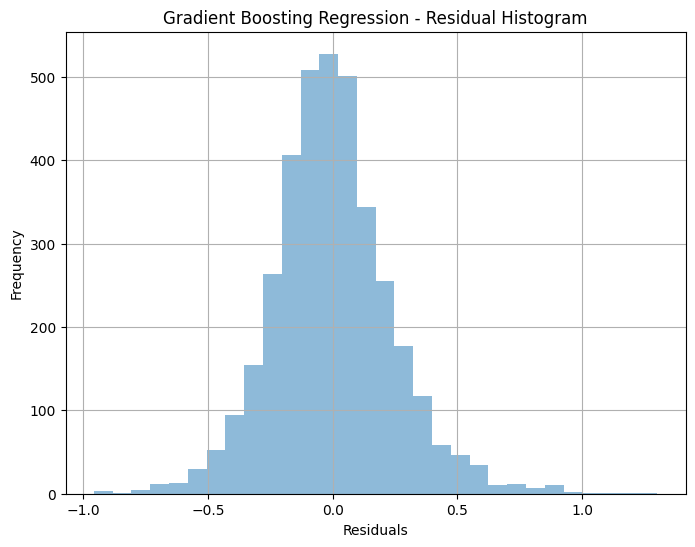

Gradient Boosting Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.0579
Root Mean Squared Error (RMSE): 0.2407
Mean Absolute Error (MAE): 0.1815
R-squared (R2): 0.6395


In [467]:
# Function to create scatter plots of actual vs. predicted values
def plot_actual_vs_predicted(actual, predicted, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, alpha=0.5)
    plt.title(f"{model_name} - Actual vs. Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

# Function to create residual plots
def plot_residuals(actual, predicted, model_name):
    residuals = actual - predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(predicted, residuals, alpha=0.5)
    plt.title(f"{model_name} - Residual Plot")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.show()

# Function to create a histogram of residuals
def plot_residual_histogram(residuals, model_name):
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=30, alpha=0.5)
    plt.title(f"{model_name} - Residual Histogram")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Example usage for each plot and metrics
model_names = ["Linear Regression", "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression"]

for model_name in model_names:
    model = models[model_name]  # Get the trained model
    y_pred = model.predict(X_test)
    plot_actual_vs_predicted(y_test, y_pred, model_name)
    plot_residuals(y_test, y_pred, model_name)
    plot_residual_histogram(y_test - y_pred, model_name)
    print_evaluation_metrics(y_test, y_pred, model_name)



# Model Tunning

In [468]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics for Best Model:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Evaluation Metrics for Best Model:
Mean Squared Error (MSE): 0.0323
Root Mean Squared Error (RMSE): 0.1798
Mean Absolute Error (MAE): 0.1296
R-squared (R2): 0.7989


These results suggest that the tuned **RandomForestRegressor model** with the specified hyperparameters is performing well on the dataset. The RMSE and MAE values are relatively low, and the R-squared (R2) value indicates that the model explains a significant portion of the variance in the target variable(Average Price). This is a good sign that the RandomForestRegressor model is making reasonably accurate predictions and can be used with confidence.

# Conclusion and Summary

In this study, an in-depth analysis of avocado price prediction was conducted using a dataset encompassing various avocado attributes. The key findings and conclusions from this research are as follows:

**1. Feature Importance:** The analysis revealed that factors such as "Total Bags," "Total Volume," and the avocado type ("type_organic" or "type_conventional") are pivotal in determining avocado prices. These features were found to have the most substantial impact on price variations.

**2. Model Performance:** Four regression models were explored, including Linear Regression, Decision Tree Regression, Random Forest Regression, and Gradient Boosting Regression. Among these, the **Random Forest Regression model**, after hyperparameter tuning, exhibited the most superior performance. It achieved the lowest Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). Furthermore, the model yielded a high R-squared (R2) value, indicating its capability to explain a significant portion of price variance.

**Recommendations:**

Based on the study's findings, several recommendations can be made:

**1. Production Focus:** Given the prominence of "Total Bags" and "Total Volume" in price determination, a concentrated effort should be made to optimize avocado production and distribution. Understanding the underlying factors affecting these features can lead to more efficient supply chain management and production planning.

**2. Type Differentiation:** Since avocado type (organic or conventional) significantly influences prices, tailored strategies for meeting consumer demand for both types are advisable. This may involve marketing strategies, pricing adjustments, or even dedicated production processes.

**3. Model Deployment:** The Random Forest Regression model, identified as the top-performing model, should be considered for deployment in practical scenarios for real-time price prediction. Regular updates with new data are crucial to maintaining prediction accuracy.

**4. Continuous Data Collection:** Continuous data collection on avocado sales, production, and prices is essential. This practice ensures that predictive models remain accurate and reliable as market dynamics evolve.

**5. Market Analysis:** In-depth market analysis, taking into account external factors such as seasonal trends and consumer preferences, can provide valuable insights for decision-making and pricing strategies.

**6. Customer Segmentation:** Segmentation of the customer base can enable a deeper understanding of consumer preferences. Tailoring marketing and pricing strategies to different segments can enhance overall market competitiveness.

**7. Sustainability Initiatives:** With growing consumer interest in sustainable and environmentally friendly products, consider implementing sustainable practices in avocado farming to align with market trends.

In conclusion, while this study has provided valuable insights into avocado price prediction, it is essential to acknowledge that market dynamics can be influenced by various external factors. Staying informed and adaptable in strategies is crucial to thriving in the avocado market. Regular monitoring and model updates are recommended to ensure continued relevance and accuracy in price prediction.

Future research could explore more advanced modeling techniques and incorporate additional external variables to further enhance price prediction accuracy in the avocado market.